
Source: Indicators of Heart Disease (2022 UPDATE)/ 2022 file with nans

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/code?datasetId=1936563&sortBy=voteCount

In [1]:
# Idea generation & planning

What is the problem (Define Research question):

    Identify key factors (features) associated with heart attacks.
    (Set heart Heart_Attacks as target variable)

Why I looked at it:
    
    To identify indicators for early detection and prevention of developing Heart_Attacks using given features.

What Data did I look at:
    
    The Data comes originally from the CDC (Center for Disease Control and Prevention)
    https://www.cdc.gov/heartdisease/risk_factors.htm
    
    Data is a major part of the Behavioral Risk Factor Surveillance System (BRFSS)
        U.S. nation’s premier system of health-related telephone surveys that collect state data about U.S. residents
        regarding their health-related risk behaviors, chronic health conditions, and use of preventive services.
        
       BRFSS now collects data in all 50 states, the District of Columbia, and three U.S. territories. 
       BRFSS completes more than 400,000 adult interviews each yeary.

What did I learn about the domain that I studied:

    Insights into risk factors for Heart_Disease
    Distributions of features and relationship between the features and the target heart 
    I validated X numbers of hypothesis regarding the relation of features and heartattacks

How ? (How do you think you can do it ? What are the required steps ?):
    
1. Get data (load CSV file)
2. Clean
    2.1 Drop any rows and columns that have to be dropped
    2.2 First split in numerical and categorical 
    
        2.2.2 Heatmap for numerical 
        
        2.2.3 Plotting for numerical
        
        2.2.4 Check numericals for outliers
        
        2.2.5 Plotting for categorical
        
    2.3 Save dataframe in SQL/ Read dataframe from SQL
    
       
3. Analyse (understand the problem, understand the data)

    3.1 (Define features and target variable) X-y split 
    
    3.2 Select relevant features
    
    3.4 Separate X (features) in numerical and categorical columns
    
    3.3 examining the distributions of features and the target variable.
    
    3.4 Create Heatmap to see correlations between numerical features
    
    3.5 Plot numerical (barplot) and categorical features (countplot)



# Define relevant column names

State: The geographical state or region of residence.

Sex: Gender identity, indicating whether the individual identifies as male or female.

GeneralHealth: Self-reported assessment of overall health status.

PhysicalHealthDays: Number of days in the past month with physical health issues.

MentalHealthDays: Number of days in the past month with mental health issues.

LastCheckupTime: Time since the last routine health checkup or examination.

PhysicalActivities: Level of engagement in physical activities or exercise.

SleepHours: Average number of hours of sleep per night.

RemovedTeeth: Indicator of whether the individual has had teeth removed.

HadHeartAttack: Indicator of whether the individual has had a heart attack.

HadAngina: Indicator of whether the individual has had angina (chest pain).

HadStroke: Indicator of whether the individual has had a stroke.

HadAsthma: Indicator of whether the individual has had asthma.

HadSkinCancer: Indicator of whether the individual has had skin cancer.

HadCOPD: Indicator of whether the individual has had chronic obstructive pulmonary disease (COPD).

HadDepressiveDisorder: Indicator of whether the individual has had a depressive disorder.

HadKidneyDisease: Indicator of whether the individual has had kidney disease.

HadArthritis: Indicator of whether the individual has had arthritis.

HadDiabetes: Indicator of whether the individual has had diabetes.

DeafOrHardOfHearing: Indicator of whether the individual is deaf or hard of hearing.

BlindOrVisionDifficulty: Indicator of whether the individual is blind or has vision difficulties.

DifficultyConcentrating: Self-reported difficulty in concentrating or focusing.

DifficultyWalking: Self-reported difficulty in walking.
DifficultyDressingBathing: Self-reported difficulty in dressing or bathing.

DifficultyErrands: Self-reported difficulty in running errands.

SmokerStatus: Smoking status, indicating whether the individual is a current smoker, former smoker, or never smoked.

ECigaretteUsage: Usage of electronic cigarettes.

ChestScan: Indicator of whether the individual has undergone a chest scan.

RaceEthnicityCategory: Categorization of race and ethnicity.

AgeCategory: Categorization of age groups.

HeightInMeters: Height of the individual in meters.

WeightInKilograms: Weight of the individual in kilograms.

BMI: Body Mass Index, calculated based on height and weight.

AlcoholDrinkers: Indicator of whether the individual consumes alcohol.

HIVTesting: Indicator of whether the individual has undergone HIV testing.

FluVaxLast12: Indicator of whether the individual received a flu vaccine in the last 12 months.

PneumoVaxEver: Indicator of whether the individual has ever received a pneumococcal vaccine.

TetanusLast10Tdap: Indicator of whether the individual received a tetanus vaccine in the last 10 years (includes Tdap).

HighRiskLastYear: Indicator of whether the individual has been at high risk for health issues in the last year.

CovidPos: Indicator of whether the individual has tested positive for COVID-19.

In [2]:
# Import librarys

import numpy as np
import pandas as pd
import seaborn as sns

import seaborn as sns # Categorical(Plotting of barplot, countplots, histplot), numerical(displot, countplot, histograms)
import matplotlib.pyplot as plt

In [3]:
# https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe
pd.set_option('display.max_columns', 40)

In [4]:
heart = pd.read_csv('heart_2022_data.csv')
heart.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack HadAngina HadStroke HadAsthma  \
0         8.0          NaN             No        No        No        No   
1         6.0          NaN             No        No        No        No   
2         5.0          NaN             No        No        No        No   
3         7.0          NaN             No        No        No       Yes   
4         9.0          NaN             No        No        No        No   

  HadSkinCancer HadCOPD HadDepressiveDisorder HadKidneyDisease HadArthritis  \
0            No      No                    No               No           No   
1           Yes      No                    No               No           No   
2           Yes      No                    No               No           No   
3            No      No                    No               No          Yes   
4            No      No                    No               No           No   

  HadDiabetes DeafOrHardOfHearing BlindOrVisionDifficulty  \
0         Yes                  No                      No   
1          No                  No                      No   
2          No                  No                      No   
3          No                  No                      No   
4          No                  No                      No   

  DifficultyConcentrating DifficultyWalking DifficultyDressingBathing  \
0                      No                No                        No   
1                      No                No                        No   
2                      No                No                        No   
3                      No                No                        No   
4                      No                No                        No   

  DifficultyErrands                           SmokerStatus  \
0                No                           Never smoked   
1                No                           Never smoked   
2                No                           Never smoked   
3                No  Current smoker - now smokes some days   
4                No                           Never smoked   

                             ECigaretteUsage ChestScan  \
0                     Not at all (right now)        No   
1  Never used e-cigarettes in my entire life        No   
2  Never used e-cigarettes in my entire life        No   
3  Never used e-cigarettes in my entire life       Yes   
4  Never used e-cigarettes in my entire life       Yes   

      RaceEthnicityCategory      AgeCategory  HeightInMeters  \
0  White only, Non-Hispanic  Age 80 or older             NaN   
1  White only, Non-Hispanic  Age 80 or older            1.60   
2  White only, Non-Hispanic     Age 55 to 59            1.57   
3  White only, Non-Hispanic              NaN            1.65   
4  White only, Non-Hispanic     Age 40 to 44            1.57   

   WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0                NaN    NaN              No         No          Yes   
1              68.04  26.57              No         No           No   
2              63.50  25.61              No         No   

In [5]:
heart.shape

(445132, 40)

In [6]:
# fulfills size requirements 1000 rows

# Cleaning column names

In [7]:
# Making column names small, replacing spaces, if existing

cols = []
for i in range(len(heart.columns)):
    cols.append(heart.columns[i].lower().replace(' ', '_'))
heart.columns = cols

In [8]:
heart.head()

state     sex generalhealth  physicalhealthdays  mentalhealthdays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     lastcheckuptime physicalactivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   sleephours removedteeth hadheartattack hadangina hadstroke hadasthma  \
0         8.0          NaN             No        No        No        No   
1         6.0          NaN             No        No        No        No   
2         5.0          NaN             No        No        No        No   
3         7.0          NaN             No        No        No       Yes   
4         9.0          NaN             No        No        No        No   

  hadskincancer hadcopd haddepressivedisorder hadkidneydisease hadarthritis  \
0            No      No                    No               No           No   
1           Yes      No                    No               No           No   
2           Yes      No                    No               No           No   
3            No      No                    No               No          Yes   
4            No      No                    No               No           No   

  haddiabetes deaforhardofhearing blindorvisiondifficulty  \
0         Yes                  No                      No   
1          No                  No                      No   
2          No                  No                      No   
3          No                  No                      No   
4          No                  No                      No   

  difficultyconcentrating difficultywalking difficultydressingbathing  \
0                      No                No                        No   
1                      No                No                        No   
2                      No                No                        No   
3                      No                No                        No   
4                      No                No                        No   

  difficultyerrands                           smokerstatus  \
0                No                           Never smoked   
1                No                           Never smoked   
2                No                           Never smoked   
3                No  Current smoker - now smokes some days   
4                No                           Never smoked   

                             ecigaretteusage chestscan  \
0                     Not at all (right now)        No   
1  Never used e-cigarettes in my entire life        No   
2  Never used e-cigarettes in my entire life        No   
3  Never used e-cigarettes in my entire life       Yes   
4  Never used e-cigarettes in my entire life       Yes   

      raceethnicitycategory      agecategory  heightinmeters  \
0  White only, Non-Hispanic  Age 80 or older             NaN   
1  White only, Non-Hispanic  Age 80 or older            1.60   
2  White only, Non-Hispanic     Age 55 to 59            1.57   
3  White only, Non-Hispanic              NaN            1.65   
4  White only, Non-Hispanic     Age 40 to 44            1.57   

   weightinkilograms    bmi alcoholdrinkers hivtesting fluvaxlast12  \
0                NaN    NaN              No         No          Yes   
1              68.04  26.57              No         No           No   
2              63.50  25.61              No         No   

In [9]:
heart.tail()

state     sex generalhealth  physicalhealthdays  \
445127  Virgin Islands  Female          Good                 0.0   
445128  Virgin Islands  Female     Excellent                 2.0   
445129  Virgin Islands  Female          Poor                30.0   
445130  Virgin Islands    Male     Very good                 0.0   
445131  Virgin Islands    Male     Very good                 0.0   

        mentalhealthdays                                    lastcheckuptime  \
445127               3.0  Within past 2 years (1 year but less than 2 ye...   
445128               2.0  Within past year (anytime less than 12 months ...   
445129              30.0                                5 or more years ago   
445130               0.0  Within past year (anytime less than 12 months ...   
445131               1.0                                                NaN   

       physicalactivities  sleephours  removedteeth hadheartattack hadangina  \
445127                Yes         6.0  None of them             No        No   
445128                Yes         7.0  None of them             No        No   
445129                 No         5.0        1 to 5             No        No   
445130                 No         5.0  None of them            Yes        No   
445131                Yes         5.0  None of them             No        No   

       hadstroke hadasthma hadskincancer hadcopd haddepressivedisorder  \
445127        No       Yes            No      No                   Yes   
445128        No        No            No      No                    No   
445129        No        No            No      No                    No   
445130        No       Yes            No      No                    No   
445131        No        No            No      No                    No   

       hadkidneydisease hadarthritis haddiabetes deaforhardofhearing  \
445127               No           No          No                  No   
445128               No           No          No                  No   
445129               No           No          No                  No   
445130               No           No          No                  No   
445131               No           No          No                  No   

       blindorvisiondifficulty difficultyconcentrating difficultywalking  \
445127                      No                      No                No   
445128                      No                      No                No   
445129                      No                     NaN                No   
445130                      No                      No                No   
445131                      No                     Yes               Yes   

       difficultydressingbathing difficultyerrands  \
445127                        No                No   
445128                        No                No   
445129                        No                No   
445130                        No                No   
445131                        No                No   

                                 smokerstatus  \
445127                           Never smoked   
445128                           Never smoked   
445129  Current smoker - now smokes every day   
445130                           Never smoked   
445131                          Former smoker   

                                  ecigaretteusage chestscan  \
445127  Never used e-cigarettes in my entire life       Yes   
445128  Never used e-cigarettes in my entire life        No   
445129                         Use them some days       NaN   
445130  Never used e-cigarettes in my entire life       Yes   
445131                     Not at all (right now)       Yes   

           raceethnicitycategory   agecategory  heightinmeters  \
445127  Black only, Non-Hispanic  Age 18 to 24            1.65   
445128  Black only, Non-Hispanic  Age 50 to 54            1.70   
445129                       NaN  Age 65 to 69            1.70   
445130  Black only, Non-Hispanic  Age 70 to 74        

In [10]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   state                      445132 non-null  object 
 1   sex                        445132 non-null  object 
 2   generalhealth              443934 non-null  object 
 3   physicalhealthdays         434205 non-null  float64
 4   mentalhealthdays           436065 non-null  float64
 5   lastcheckuptime            436824 non-null  object 
 6   physicalactivities         444039 non-null  object 
 7   sleephours                 439679 non-null  float64
 8   removedteeth               433772 non-null  object 
 9   hadheartattack             442067 non-null  object 
 10  hadangina                  440727 non-null  object 
 11  hadstroke                  443575 non-null  object 
 12  hadasthma                  443359 non-null  object 
 13  hadskincancer              44

In [11]:
# Mostly categorical values (object)
    # Check categorical values
# Numerical only physicalhealthdays, mentalhealthdays, sleephours, eightinmeters, weightinkilograms, bmi

In [12]:
heart.columns

Index(['state', 'sex', 'generalhealth', 'physicalhealthdays',
       'mentalhealthdays', 'lastcheckuptime', 'physicalactivities',
       'sleephours', 'removedteeth', 'hadheartattack', 'hadangina',
       'hadstroke', 'hadasthma', 'hadskincancer', 'hadcopd',
       'haddepressivedisorder', 'hadkidneydisease', 'hadarthritis',
       'haddiabetes', 'deaforhardofhearing', 'blindorvisiondifficulty',
       'difficultyconcentrating', 'difficultywalking',
       'difficultydressingbathing', 'difficultyerrands', 'smokerstatus',
       'ecigaretteusage', 'chestscan', 'raceethnicitycategory', 'agecategory',
       'heightinmeters', 'weightinkilograms', 'bmi', 'alcoholdrinkers',
       'hivtesting', 'fluvaxlast12', 'pneumovaxever', 'tetanuslast10tdap',
       'highrisklastyear', 'covidpos'],
      dtype='object')

# Clean Invalid data

In [13]:
# No invalid data, as can be seen when using below function "unique_values_all_columns" in Clean the data section.

# Clean the data

In [14]:
# handling missing values, converting categorical variables into dummy/indicator variables, and encoding ordinal variables.
# I am not going to use a prediction model, should I still (One Hot Encode, Ordinal Encode, Scale)?
# Should I create Bins (also just relevent for One Hot Encoddeing to reduce values)?
# Dropping features because of 

In [15]:
heart.isna().sum()

state                            0
sex                              0
generalhealth                 1198
physicalhealthdays           10927
mentalhealthdays              9067
lastcheckuptime               8308
physicalactivities            1093
sleephours                    5453
removedteeth                 11360
hadheartattack                3065
hadangina                     4405
hadstroke                     1557
hadasthma                     1773
hadskincancer                 3143
hadcopd                       2219
haddepressivedisorder         2812
hadkidneydisease              1926
hadarthritis                  2633
haddiabetes                   1087
deaforhardofhearing          20647
blindorvisiondifficulty      21564
difficultyconcentrating      24240
difficultywalking            24012
difficultydressingbathing    23915
difficultyerrands            25656
smokerstatus                 35462
ecigaretteusage              35660
chestscan                    56046
raceethnicitycategor

In [16]:
# Unique value counts for all columns
# https://www.w3schools.com/python/python_lists_comprehension.asp
# https://realpython.com/python-f-strings/
# https://stackoverflow.com/questions/11497376/how-do-i-specify-new-lines-in-a-string-in-order-to-write-multiple-lines-to-a-fil

#def unique_values_all_columns(df):
    #[print(f"Column: {col}\n{df[col].unique()}\n") for col in df.columns]

#unique_values_all_columns(heart)

In [17]:
# There are suspicious Max and min vlaues for some columns which I have to pay attention to, when checking for outliers
    # sleephours 1 and 24?

In [18]:
# hadheartattack is my target variable remove all NaN variables
# https://sparkbyexamples.com/pandas/pandas-drop-rows-with-nan-values-in-dataframe/
# Drop rows that has NaN values on selected columns
heart.dropna(subset=['hadheartattack'], inplace=True)

In [19]:
heart['hadheartattack'].nunique(dropna=False)

2

In [20]:
heart['hadheartattack'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
# Splitting numerical and categorical for plotting

categorical = heart.select_dtypes(include=object)
numerical = heart.select_dtypes(include=np.number)

In [22]:
# Look at the number of unique values in the dataframes

def value_count(df):
    for columns in df:
            print (len(df[columns].value_counts()),':  ',columns)
    return


In [23]:
# When looking at the unique values we can see, that the separation by object and (int, float)
# makes more sense here than separating by the amount of unique values. 
# No further formatting of data types necessary.

In [24]:
value_count(numerical)

31 :   physicalhealthdays
31 :   mentalhealthdays
24 :   sleephours
109 :   heightinmeters
599 :   weightinkilograms
3977 :   bmi


In [25]:
value_count(categorical)

54 :   state
2 :   sex
5 :   generalhealth
4 :   lastcheckuptime
2 :   physicalactivities
4 :   removedteeth
2 :   hadheartattack
2 :   hadangina
2 :   hadstroke
2 :   hadasthma
2 :   hadskincancer
2 :   hadcopd
2 :   haddepressivedisorder
2 :   hadkidneydisease
2 :   hadarthritis
4 :   haddiabetes
2 :   deaforhardofhearing
2 :   blindorvisiondifficulty
2 :   difficultyconcentrating
2 :   difficultywalking
2 :   difficultydressingbathing
2 :   difficultyerrands
4 :   smokerstatus
4 :   ecigaretteusage
2 :   chestscan
5 :   raceethnicitycategory
13 :   agecategory
2 :   alcoholdrinkers
2 :   hivtesting
2 :   fluvaxlast12
2 :   pneumovaxever
4 :   tetanuslast10tdap
2 :   highrisklastyear
3 :   covidpos


In [26]:
# Lets look at the unique value for categoricals and numericals

In [27]:
# Dealing with Null values

# Numerical (No scaling since I do not build pred model)

In [28]:
# The percentage of Null values for numerical values

In [29]:
numerical.isnull().sum()/len(numerical)

physicalhealthdays    0.023971
mentalhealthdays      0.019888
sleephours            0.011754
heightinmeters        0.063658
weightinkilograms     0.093800
bmi                   0.108830
dtype: float64

In [30]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
# Number includes all numerical types

def fill_mean_except_bmi(numerical):
    numeric_columns = numerical.select_dtypes(include='number').columns
    for column in numeric_columns:
            numerical[column].fillna(numerical[column].mean(), inplace=True)

In [31]:
fill_mean_except_bmi(numerical)

In [32]:
numerical.isna().sum()

physicalhealthdays    0
mentalhealthdays      0
sleephours            0
heightinmeters        0
weightinkilograms     0
bmi                   0
dtype: int64

In [33]:
# prediction on bmi did not work, error Unknown label type: 'continuous'

In [34]:
heart.describe().T

count       mean        std    min    25%    50%  \
physicalhealthdays  431470.0   4.322639   8.662400   0.00   0.00   0.00   
mentalhealthdays    433275.0   4.371406   8.372727   0.00   0.00   0.00   
sleephours          436871.0   7.023268   1.496407   1.00   6.00   7.00   
heightinmeters      413926.0   1.702758   0.107142   0.91   1.63   1.70   
weightinkilograms   400601.0  83.077346  21.439283  22.68  68.04  80.74   
bmi                 393957.0  28.527818   6.550960  12.02  24.13  27.44   

                      75%     max  
physicalhealthdays   3.00   30.00  
mentalhealthdays     5.00   30.00  
sleephours           8.00   24.00  
heightinmeters       1.78    2.41  
weightinkilograms   95.25  292.57  
bmi                 31.74   99.64

In [35]:
# Add function to round all numerical values to 2 decimal places, necessary when looking at sql database later on

In [36]:
# https://www.tutorialspoint.com/How-to-round-down-to-2-decimals-a-float-using-Python#:~:text=Using%20ceil()%20function,-Algorithm%20(Steps)&text=the%20math%20module.-,Create%20a%20variable%20to%20store%20the%20input%20floating%2Dpoint%20number,and%20print%20the%20resultant%20number.
# data['customer_lifetime_value'] = data['customer_lifetime_value'].round(decimals = 2)

def round_decimals(numerical):
    numeric_columns = numerical.select_dtypes(include='number').columns
    for column in numeric_columns:
        numerical[column] = numerical[column].round(2)

In [37]:
round_decimals(numerical)

# Categoricals

# No One Hot Encoding since I do not build pred model

In [39]:
#print(unique_values_all_columns(categorical))

In [40]:
categorical.head()

state     sex generalhealth  \
0  Alabama  Female     Very good   
1  Alabama  Female     Excellent   
2  Alabama  Female     Very good   
3  Alabama  Female     Excellent   
4  Alabama  Female          Fair   

                                     lastcheckuptime physicalactivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

  removedteeth hadheartattack hadangina hadstroke hadasthma hadskincancer  \
0          NaN             No        No        No        No            No   
1          NaN             No        No        No        No           Yes   
2          NaN             No        No        No        No           Yes   
3          NaN             No        No        No       Yes            No   
4          NaN             No        No        No        No            No   

  hadcopd haddepressivedisorder hadkidneydisease hadarthritis haddiabetes  \
0      No                    No               No           No         Yes   
1      No                    No               No           No          No   
2      No                    No               No           No          No   
3      No                    No               No          Yes          No   
4      No                    No               No           No          No   

  deaforhardofhearing blindorvisiondifficulty difficultyconcentrating  \
0                  No                      No                      No   
1                  No                      No                      No   
2                  No                      No                      No   
3                  No                      No                      No   
4                  No                      No                      No   

  difficultywalking difficultydressingbathing difficultyerrands  \
0                No                        No                No   
1                No                        No                No   
2                No                        No                No   
3                No                        No                No   
4                No                        No                No   

                            smokerstatus  \
0                           Never smoked   
1                           Never smoked   
2                           Never smoked   
3  Current smoker - now smokes some days   
4                           Never smoked   

                             ecigaretteusage chestscan  \
0                     Not at all (right now)        No   
1  Never used e-cigarettes in my entire life        No   
2  Never used e-cigarettes in my entire life        No   
3  Never used e-cigarettes in my entire life       Yes   
4  Never used e-cigarettes in my entire life       Yes   

      raceethnicitycategory      agecategory alcoholdrinkers hivtesting  \
0  White only, Non-Hispanic  Age 80 or older              No         No   
1  White only, Non-Hispanic  Age 80 or older              No         No   
2  White only, Non-Hispanic     Age 55 to 59              No         No   
3  White only, Non-Hispanic              NaN              No         No   
4  White only, Non-Hispanic     Age 40 to 44             Yes         No   

  fluvaxlast12 pneumovaxever  \
0          Yes            No   
1           No            No   
2           No            No   
3          Yes           Yes   
4           No           Yes   

                                   tetanuslast10tdap highrisklastyear covidpos  
0  Yes, received tetanus shot but not sure what type               No       No  
1  No, did not receive any tetanus shot in the pa...               No       No  
2                                                NaN               N

In [41]:
categorical.isna().sum()/len(categorical)

state                        0.000000
sex                          0.000000
generalhealth                0.002477
lastcheckuptime              0.018190
physicalactivities           0.002199
removedteeth                 0.024906
hadheartattack               0.000000
hadangina                    0.008116
hadstroke                    0.002420
hadasthma                    0.003251
hadskincancer                0.006252
hadcopd                      0.004158
haddepressivedisorder        0.005477
hadkidneydisease             0.003651
hadarthritis                 0.005232
haddiabetes                  0.001839
deaforhardofhearing          0.045871
blindorvisiondifficulty      0.047934
difficultyconcentrating      0.053827
difficultywalking            0.053395
difficultydressingbathing    0.053189
difficultyerrands            0.057075
smokerstatus                 0.079040
ecigaretteusage              0.079497
chestscan                    0.125067
raceethnicitycategory        0.030986
agecategory 

In [42]:
# Drop the columns with the highest Nan vlaues, here and tetanuslast10tdap

In [43]:
categorical.drop(['tetanuslast10tdap'], axis=1, inplace=True)

In [44]:
# Drop raceethnicitycategory (sensitivity and awareness of potential ethical and social considerations)
categorical.drop(['raceethnicitycategory'], axis=1, inplace=True)

In [45]:
#unique_values_all_columns(categorical)

In [46]:
# General columns fill with mode

In [47]:
# generalhealth: Fill with the Mode
mode_generalhealth = categorical['generalhealth'].mode()[0]
categorical['generalhealth'].fillna(mode_generalhealth, inplace=True)

In [48]:
# lastcheckuptime replace Nan with Mode
mode_lastcheckuptime = categorical['lastcheckuptime'].mode()[0]
categorical['lastcheckuptime'].fillna(mode_lastcheckuptime, inplace=True)

In [49]:
# physicalactivities replace Nan with Mode
mode_physicalactivities = categorical['physicalactivities'].mode()[0]
categorical['physicalactivities'].fillna(mode_physicalactivities, inplace=True)

In [50]:
# agecategory replace Nan with Mode
mode_agecategory = categorical['agecategory'].mode()[0]
categorical['agecategory'].fillna(mode_agecategory, inplace=True)

In [51]:
# If only value for Yes and No fill with No 

In [52]:
# Fill columns which are significant for mediacl condititons with NO (When only Yes, No given)
def fill_nan_with_NO(dataframe, columns):
    for column in columns:
        dataframe[column].fillna('No', inplace=True)

In [53]:
columns_to_fill_with_No = ['hadangina', 'hadstroke', 'hadasthma', 'hadskincancer', 'hadcopd', 'haddepressivedisorder', 'hadkidneydisease', 'hadarthritis', 'haddiabetes', 'deaforhardofhearing', 'blindorvisiondifficulty', 'difficultyconcentrating', 'difficultywalking', 'difficultydressingbathing', 'difficultyerrands', 'chestscan', 'alcoholdrinkers', 'hivtesting', 'fluvaxlast12', 'pneumovaxever', 'highrisklastyear', 'covidpos']

In [54]:
fill_nan_with_NO(categorical, columns_to_fill_with_No)

In [55]:
# removedteeth replace NaN with None of them
categorical["removedteeth"].fillna("None of them",inplace=True)

In [56]:
# Fill smokerstatus with Never smoked
categorical['smokerstatus'].fillna('Never smoked', inplace=True)

In [57]:
# Fill ecigaretteusage with Never used e-cigarettes in my entire life
categorical['ecigaretteusage'].fillna('Never used e-cigarettes in my entire life', inplace=True)

In [58]:
categorical.isna().sum()

state                        0
sex                          0
generalhealth                0
lastcheckuptime              0
physicalactivities           0
removedteeth                 0
hadheartattack               0
hadangina                    0
hadstroke                    0
hadasthma                    0
hadskincancer                0
hadcopd                      0
haddepressivedisorder        0
hadkidneydisease             0
hadarthritis                 0
haddiabetes                  0
deaforhardofhearing          0
blindorvisiondifficulty      0
difficultyconcentrating      0
difficultywalking            0
difficultydressingbathing    0
difficultyerrands            0
smokerstatus                 0
ecigaretteusage              0
chestscan                    0
agecategory                  0
alcoholdrinkers              0
hivtesting                   0
fluvaxlast12                 0
pneumovaxever                0
highrisklastyear             0
covidpos                     0
dtype: i

# Dealing with duplicates

Use the .duplicated() method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:

1. Dropping all duplicate rows
2. Keeping only the first occurrence of each duplicated row
3. Keeping only the last occurrence of each duplicated row
4. Dropping duplicates based on a subset of columns
5. Dropping duplicates based on a specific column

Implement your chosen strategy using the drop_duplicates() function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using .duplicated().

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

In [59]:
# Every row should represent an individual person. 
# I assume there are unique records. 
# I can't drop any value here.

In [60]:
numerical.duplicated().sum()

253984

In [61]:
categorical.duplicated().sum()

23148

# Checking for outliers (numerical)

In [62]:
# There are suspicious Max and min vlaues for some numerical columns which I have to pay attention to, when checking for outliers
    # sleephours 1 and 24?

In [63]:
# Check the numerical values for outliers

def outlier(Dataframe):
    for column in Dataframe.columns:
        sns.boxplot(x=Dataframe[column])
        plt.show()
    return None

In [64]:
#outlier(numerical)

In [65]:
# Insights and conclusion:
   #  There are no clear outliers visible. In all numerical features are a lot of high values. 
    # Nevertheless I have to check for unrealistic min and max vlaues. 

In [66]:
# Height
    # Look at the Outliers like the height value of 2.41. 
    # Dont just eliminate them, but look at them as a separate group (very tall, very small)
    # search for a reference source for camparison
    # It might tell me soemthing about the relationship between height and heartattack
        # Very short/tall people e.g. much higher risk 

In [67]:
# Search for a source for height of US 
    # https://edition.cnn.com/2021/08/23/us/igor-vovkovinskiy-tallest-living-man-us-dies-trnd/index.html
    # Tallest man in US died in 2021 with 234.521 cm.
        # Higher values are probably errors.
            # I will drop them
    # They probably reverse engineered the height from bmi

In [68]:
numerical.columns

Index(['physicalhealthdays', 'mentalhealthdays', 'sleephours',
       'heightinmeters', 'weightinkilograms', 'bmi'],
      dtype='object')

In [69]:
# Drop unrealisticly high values over 235

error_height = numerical[numerical['heightinmeters'] > 2.35]
error_height

physicalhealthdays  mentalhealthdays  sleephours  heightinmeters  \
27770                  1.0               0.0         7.0            2.36   
109571                 0.0               0.0         6.0            2.41   
221602                 0.0              10.0         8.0            2.41   
239776                 0.0               0.0        10.0            2.41   
264506                30.0               0.0         5.0            2.41   
356800                 0.0               0.0         6.0            2.41   

        weightinkilograms    bmi  
27770               77.11  13.82  
109571             136.08  23.37  
221602             116.12  19.94  
239776              89.36  15.35  
264506              83.08  28.53  
356800              90.72  15.58

In [70]:
type(error_height)

pandas.core.frame.DataFrame

In [71]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html
numerical.drop(error_height.index, inplace=True)

In [72]:
numerical[numerical['heightinmeters'] > 2.35]

Empty DataFrame
Columns: [physicalhealthdays, mentalhealthdays, sleephours, heightinmeters, weightinkilograms, bmi]
Index: []

In [73]:
iqr = np.nanpercentile(numerical['heightinmeters'],75) - np.nanpercentile(numerical['heightinmeters'],25)

# range between the 75th percentile and 25th percentile 
# iqr measure of the spread or dispersion of the middle 50% of the data.

In [74]:
# multiplies interquartile Range (IQR) by 1.5. 
# Use this as the upper limit to remove outliers, we would remove way to many 
# Major Outliers +3 IQR
# https://dataschool.com/fundamentals-of-analysis/what-is-the-interquartile-range/

minor_upper_limit = np.nanpercentile(numerical['heightinmeters'],75) + 1.5*iqr
minor_upper_limit
print(iqr)
print(minor_upper_limit)

0.15000000000000013
2.0050000000000003


In [75]:
height_minor_outliers = numerical[numerical['heightinmeters'] > 2]

In [76]:
display(height_minor_outliers)

physicalhealthdays  mentalhealthdays  sleephours  heightinmeters  \
1534                   0.0               0.0         7.0            2.03   
1551                   0.0               0.0         8.0            2.01   
2249                   0.0              20.0         7.0            2.01   
4831                   0.0               0.0         7.0            2.01   
5289                   0.0               5.0         7.0            2.11   
...                    ...               ...         ...             ...   
440955                 3.0               0.0         5.0            2.06   
443911                 0.0               0.0         8.0            2.01   
444197                 0.0               0.0         8.0            2.03   
444695                 0.0               0.0         7.0            2.13   
444851                30.0              25.0         5.0            2.01   

        weightinkilograms    bmi  
1534                70.31  17.03  
1551                95.25  23.66  
2249               106.59  26.47  
4831               117.93  29.29  
5289                70.31  15.82  
...                   ...    ...  
440955             127.01  30.00  
443911             114.31  28.39  
444197              90.72  21.97  
444695              68.04  14.95  
444851             106.14  26.36  

[880 rows x 6 columns]

In [77]:
len(height_minor_outliers)

880

In [78]:
height_major_outliers = np.nanpercentile(numerical['heightinmeters'],75) + 3*iqr
print(iqr)
print(height_major_outliers)

0.15000000000000013
2.2300000000000004


In [79]:
height_major_outliers = numerical[numerical['heightinmeters'] > 2.23]

In [80]:
len(height_major_outliers)

22

In [81]:
# There are 22 values over this threshold. I could look at them as a separate group in relation to heart attack risk.

In [82]:
# Cutting of major outliers outside of iq3*3 ? How can the error be caused?
# Potentially wrong data entries when self reporting 

In [83]:
# Looking at sleephours
# My lowest age group is 18 to 24
# Chose reasonable cutoffpoint 12 hours as max. 
error_sleep = numerical[numerical['sleephours'] > 12]

In [84]:
len(error_sleep)

1519

In [85]:
numerical.drop(error_sleep.index, inplace=True)

In [86]:
sleep_major_outliers = np.nanpercentile(numerical['sleephours'],75) + 3*iqr
print(iqr)
print(sleep_major_outliers)

0.15000000000000013
8.450000000000001


In [87]:
sleep_major_outliers = numerical[numerical['sleephours'] > 8.45]

In [88]:
len(sleep_major_outliers)

35042

In [89]:
# Could potentially be used as seperate group to look at?

In [90]:
numerical.describe().T

count       mean        std    min    25%    50%  \
physicalhealthdays  440542.0   4.295226   8.526620   0.00   0.00   0.00   
mentalhealthdays    440542.0   4.350194   8.263571   0.00   0.00   0.00   
sleephours          440542.0   6.991862   1.382085   1.00   6.00   7.00   
heightinmeters      440542.0   1.702632   0.103615   0.91   1.63   1.70   
weightinkilograms   440542.0  83.069009  20.391486  22.68  68.04  81.65   
bmi                 440542.0  28.522900   6.172685  12.02  24.41  28.29   

                      75%     max  
physicalhealthdays   4.00   30.00  
mentalhealthdays     4.37   30.00  
sleephours           8.00   12.00  
heightinmeters       1.78    2.34  
weightinkilograms   91.63  292.57  
bmi                 31.01   99.64

In [91]:
# https://www.ojp.gov/ncjrs/virtual-library/abstracts/not-enough-sleep-dangerous#:~:text=The%20bare%20minimum%20of%20sleep,quality%20and%20quantity%20of%20sleep.
# bare minimum sleeping hours to survive is 4  

error_sleep_2 = numerical[numerical['sleephours'] < 4]

In [92]:
numerical.drop(error_sleep_2.index, inplace=True)

In [93]:
error_sleep_2

physicalhealthdays  mentalhealthdays  sleephours  heightinmeters  \
88                    0.00               0.0         1.0            1.60   
160                   5.00               1.0         3.0            1.85   
429                  10.00               4.0         2.0            1.85   
492                  30.00              30.0         3.0            1.75   
534                  30.00              30.0         3.0            1.65   
...                    ...               ...         ...             ...   
444797                1.00               0.0         2.0            1.60   
444874                4.32               0.0         3.0            1.75   
444907               10.00              10.0         1.0            1.65   
444960                5.00               0.0         3.0            1.78   
445069               20.00              17.0         3.0            1.73   

        weightinkilograms    bmi  
88                  54.43  21.26  
160                 97.52  28.37  
429                 75.75  22.03  
492                 63.96  20.82  
534                 48.08  17.64  
...                   ...    ...  
444797              83.91  32.77  
444874              81.65  26.58  
444907              46.27  16.97  
444960              93.89  29.70  
445069             109.77  36.80  

[5841 rows x 6 columns]

# Checking Correlations

In [94]:
########### 4.1 #############

In [95]:
len(heart)

442067

In [96]:
# Defining the function
def disc_cont(df,col):
        if df[col].nunique() > 0.01*len(df):
            return('continuous')
        else:
            return('discrete')

In [97]:
disc_list = []
cont_list = []

In [98]:
for col in numerical.columns:
    if disc_cont(numerical,col) == 'continuous':
        cont_list.append(col)
    else: 
        disc_list.append(col)

In [99]:
continous_df = numerical[cont_list].copy()
dicrete_df = numerical[disc_list].copy()

In [100]:
continous_df.head(5)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [101]:
dicrete_df.head(5)

physicalhealthdays  mentalhealthdays  sleephours  heightinmeters  \
0                 0.0               0.0         8.0            1.70   
1                 0.0               0.0         6.0            1.60   
2                 2.0               3.0         5.0            1.57   
3                 0.0               0.0         7.0            1.65   
4                 2.0               0.0         9.0            1.57   

   weightinkilograms    bmi  
0              83.08  28.53  
1              68.04  26.57  
2              63.50  25.61  
3              63.50  23.30  
4              53.98  21.77

In [102]:
# Everything gets put in discrete so no added value from this

In [103]:
# multicollinearity between numerical features, to see if there is a too high correlation (over 0.9)

In [104]:
correlations = numerical.corr()
correlations

physicalhealthdays  mentalhealthdays  sleephours  \
physicalhealthdays            1.000000          0.301716   -0.055197   
mentalhealthdays              0.301716          1.000000   -0.136905   
sleephours                   -0.055197         -0.136905    1.000000   
heightinmeters               -0.049259         -0.047937   -0.013823   
weightinkilograms             0.066849          0.036358   -0.059901   
bmi                           0.104422          0.069963   -0.058614   

                    heightinmeters  weightinkilograms       bmi  
physicalhealthdays       -0.049259           0.066849  0.104422  
mentalhealthdays         -0.047937           0.036358  0.069963  
sleephours               -0.013823          -0.059901 -0.058614  
heightinmeters            1.000000           0.458946 -0.025581  
weightinkilograms         0.458946           1.000000  0.850921  
bmi                      -0.025581           0.850921  1.000000

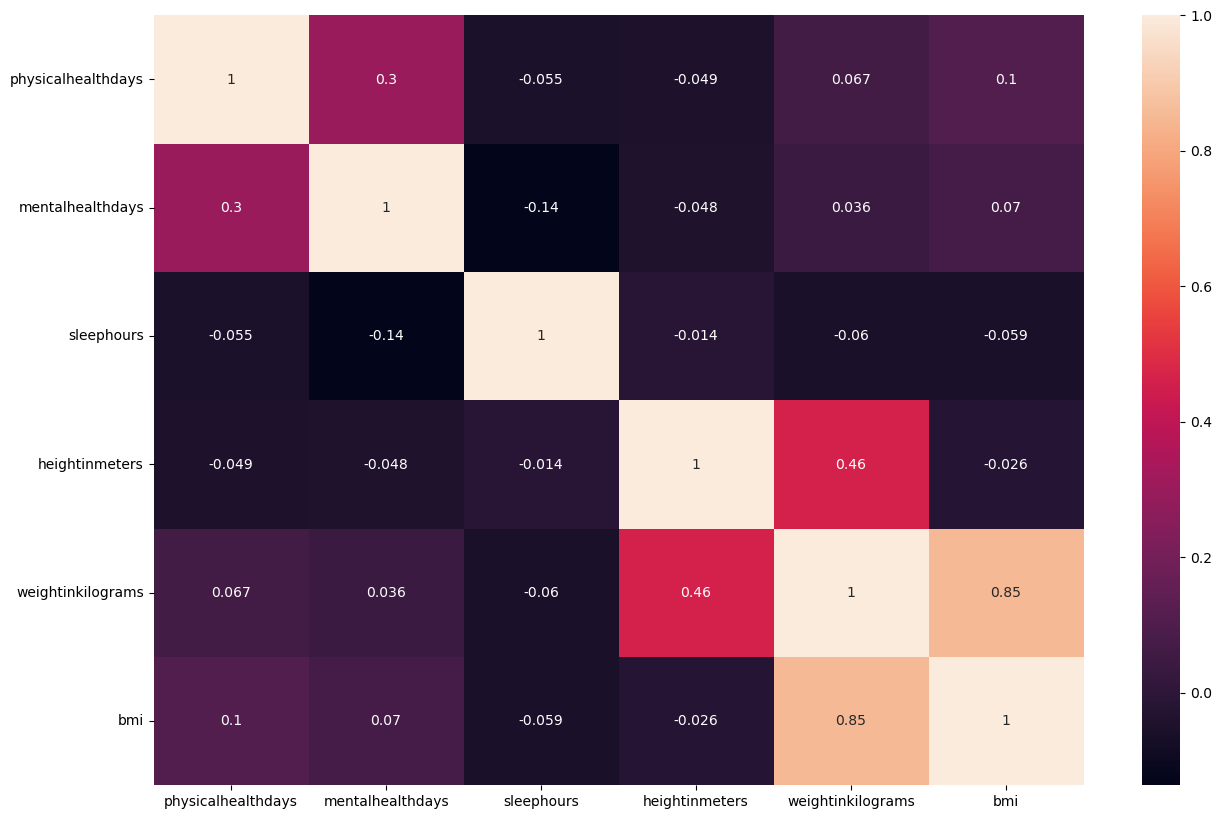

In [105]:
# Heatmap
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(numerical.corr(), annot=True)
plt.show()

In [106]:
# No features have to be excluded because of multicollinearity
    # weight and BMI have a very high correlation, but not over defined threshold of 0.9

In [107]:
# Function for plotting
#Use seaborn library to construct distribution plots for the numerical variables
#for column in numerical.columns:
    #sns.displot(numerical[column],kde=True)
    #plt.show()

In [108]:
# Show the distribution of the numerical values

#Use Matplotlib to construct histograms
#fig, ax = plt.subplots()
#for column in numerical.columns:
    #plt.hist(numerical[column])
    #plt.show()

In [109]:
# Insights and conclusion:
    # Distributions of numerical features
        # standard distribution in height as expected
        # Right skewed: physicalhealthdays, mentalhealthdays
        # Distribution for eightinkilograms and bmi are very similar, shows the high correlation between them
        # In sleephours vlaues are missing between 7 and 8 hours
            # Could show tendency for whole numbers. 
                # By far the most people sleep between 7 and 8 hours, 
                # possible, that tendency to round to one of these numbers shows here the most.

In [110]:
numerical.columns

Index(['physicalhealthdays', 'mentalhealthdays', 'sleephours',
       'heightinmeters', 'weightinkilograms', 'bmi'],
      dtype='object')

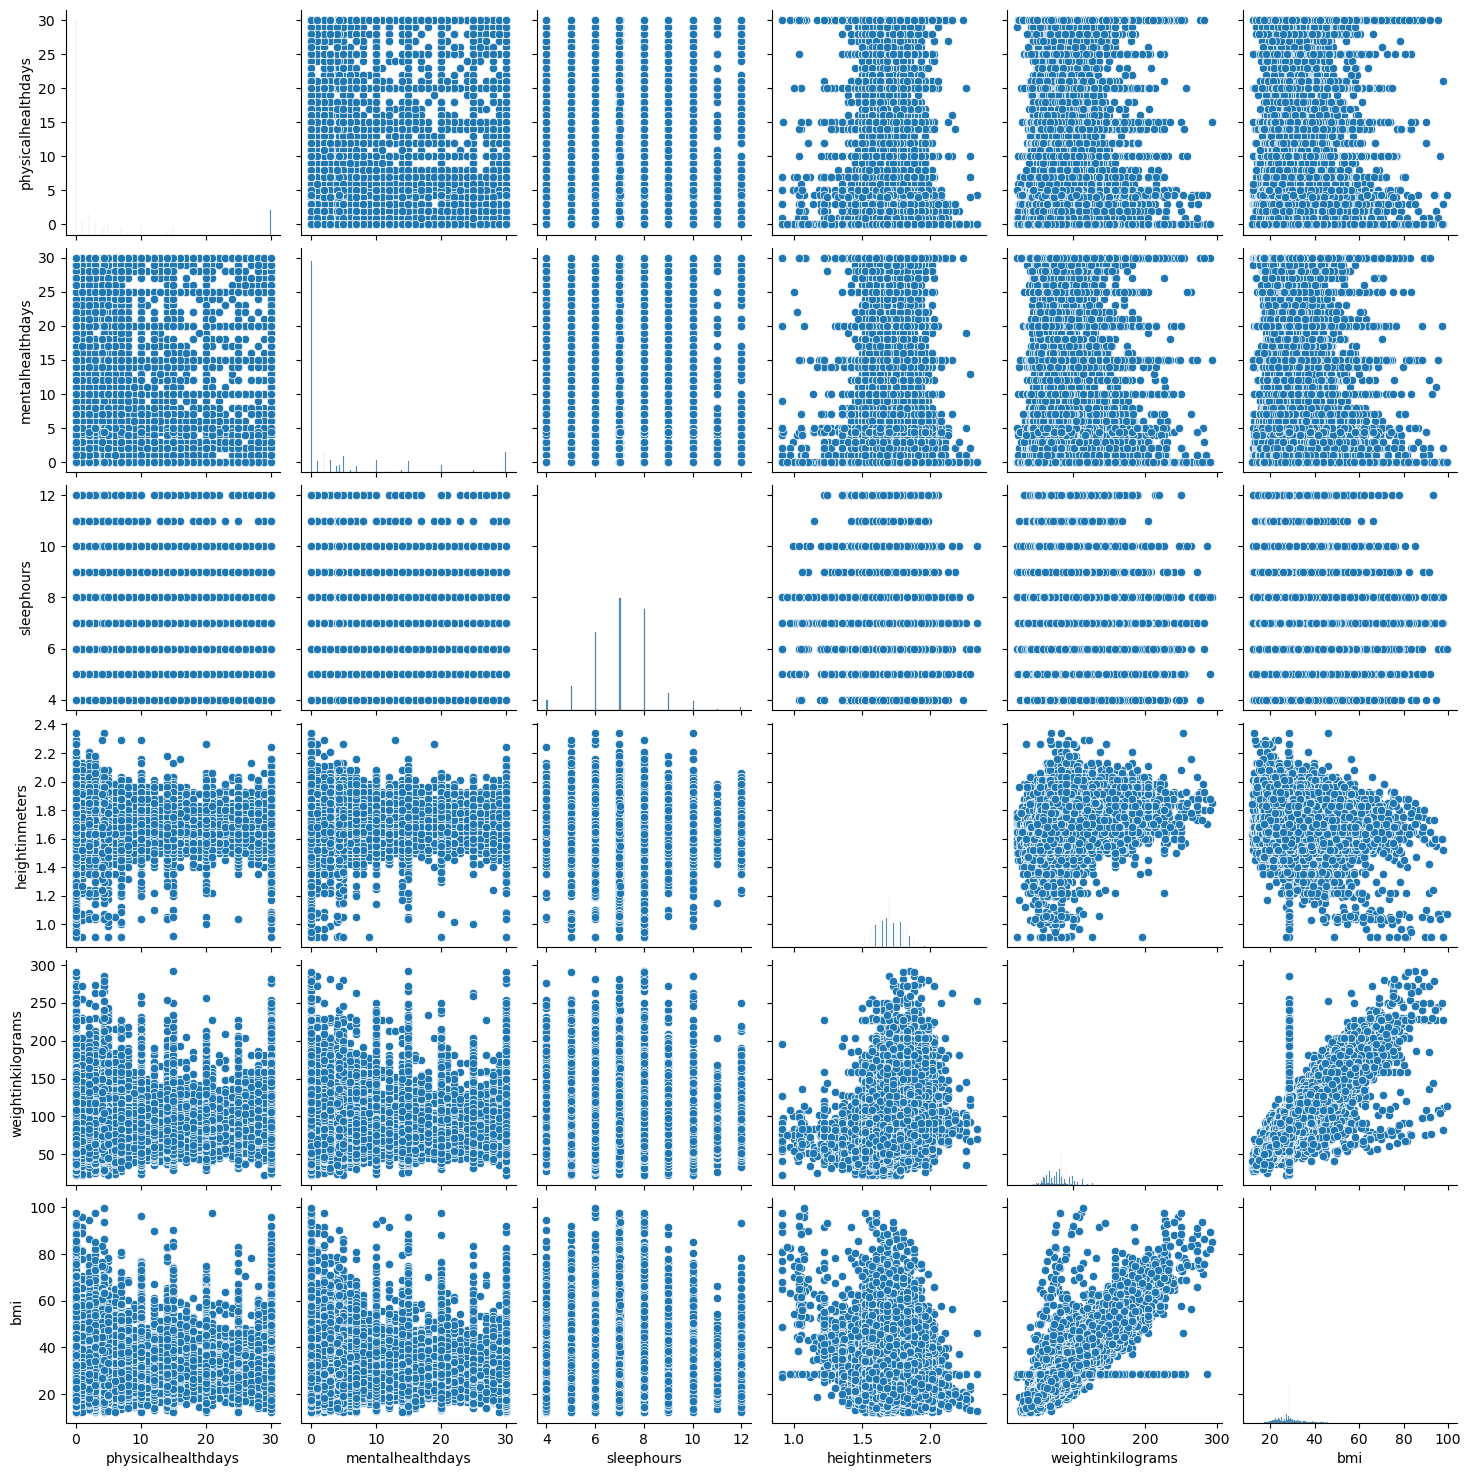

In [111]:
# the big bomb of Visual Data Analysis
sns.pairplot(numerical)

In [112]:
# Vertical and Horizontal lines could represent already existing bins

In [113]:
# Bin the other numerical values for plotting (sleephour already seems to be bined)

# https://nutrition.health.gov.lk/english/body-mass-index-bmi/

Underweight = <18.5 kg/m2 (your body is less than the normal recommended weight. you need to eat more nutritious food with adequate exercises. Read more)
Normal weight = 18.5 kg/m2 – 22.9 kg/m2 (Your weight is within the normal recommended weight. Maintain your weight with adequate exercises. Read more.)
Risk to overweight= 23 kg/m2 – 24.9 kg/m2 (Your weight is within the normal recommended weight. Try to bring down it with more exercises and correct dietary practices. Read more.)
Overweight = 25 kg/m2 – 29.9 kg/m2 (Your weight is more than the normal recommended weight. Bring down it with more exercises and correct dietary practices. Read more)
Obesity = BMI of 30 kg/m2 or greater (Your weight is very much higher than the normal recommended weight and is a risk factor for many other diseases like diabetes and heart diseases. Bring down it with more exercises, correct dietary practices and medical advices. Read more)


In [114]:
# bmi 
# cut in 5 designed bins
# It is important to exceed the maximum value, if the row is outside of the range, NULL will be assigned
# Also the lowest value has to be below the minimum


bmi_binnames = ["Underweight", "Normal_weight", "Risk_to_overweight", "Overweight ", "Obesity"]

numerical['bmi_5_bins'] = pd.cut(numerical['bmi'],[0,18.4999999999,22.9,24.9,29.9,200], labels = bmi_binnames)

numerical['bmi_5_bins'].value_counts(dropna=False)

Overweight            184612
Obesity               131594
Normal_weight          60524
Risk_to_overweight     51473
Underweight             6498
Name: bmi_5_bins, dtype: int64

In [115]:
height_binnames = ["Short", "Average", "Tall", "Very_Tall", "Giant"]

# Taking the inner upper limit of 1,5*iqr as Giant edge (2 meter)

numerical['heightinmeters_5_bins'] = pd.cut(numerical['heightinmeters'],[0, 1.50, 1.75, 1.85, 2.00, 2.35], labels = height_binnames)
numerical['heightinmeters_5_bins'].value_counts(dropna=False)

Average      304246
Tall          97465
Very_Tall     24676
Short          7462
Giant           852
Name: heightinmeters_5_bins, dtype: int64

In [116]:
display(numerical)

physicalhealthdays  mentalhealthdays  sleephours  heightinmeters  \
0                      0.0               0.0         8.0            1.70   
1                      0.0               0.0         6.0            1.60   
2                      2.0               3.0         5.0            1.57   
3                      0.0               0.0         7.0            1.65   
4                      2.0               0.0         9.0            1.57   
...                    ...               ...         ...             ...   
445127                 0.0               3.0         6.0            1.65   
445128                 2.0               2.0         7.0            1.70   
445129                30.0              30.0         5.0            1.70   
445130                 0.0               0.0         5.0            1.83   
445131                 0.0               1.0         5.0            1.68   

        weightinkilograms    bmi          bmi_5_bins heightinmeters_5_bins  
0                   83.08  28.53         Overweight                Average  
1                   68.04  26.57         Overweight                Average  
2                   63.50  25.61         Overweight                Average  
3                   63.50  23.30  Risk_to_overweight               Average  
4                   53.98  21.77       Normal_weight               Average  
...                   ...    ...                 ...                   ...  
445127              69.85  25.63         Overweight                Average  
445128              83.01  28.66         Overweight                Average  
445129              49.90  17.23         Underweight               Average  
445130             108.86  32.55             Obesity                  Tall  
445131              63.50  22.60       Normal_weight               Average  

[434701 rows x 8 columns]

# Looking at Categorical features

In [117]:
# Now the distribution of the categorical values including our target variable hadheartattack

In [118]:
 #for column in categorical.columns:
        #sns.countplot(x=column, data=heart)
        #plt.show()

In [119]:
# The target vlaue hadheartattack has a significantly higher amount of without than with heartattack
    # imbalanced target variable
    
    # Therefore you have to take into account, that the variation you will
        # see in had a heart attack is much wider than in did not have a heart attack 

In [120]:
# Check if the distribution in the sample is realistic

In [121]:
# Calculate the amount of years the people in my sample lived?
categorical['agecategory'].nunique()

13

In [122]:
categorical['agecategory'].value_counts()

Age 65 to 69       55615
Age 60 to 64       44208
Age 70 to 74       43199
Age 55 to 59       36628
Age 80 or older    35738
Age 50 to 54       33461
Age 75 to 79       32242
Age 40 to 44       29792
Age 45 to 49       28405
Age 35 to 39       28385
Age 18 to 24       26798
Age 30 to 34       25695
Age 25 to 29       21901
Name: agecategory, dtype: int64

In [123]:
# To make it easier assume all class ranges are the same size (over 80 = 80-84) and I assume everybode in the class
# lived the median amount of years of the class range.

Amount_of_years_lived_sample = (((65+69)/2)*55615)+(((60+64)/2)*44208)+(((70+74)/2)*43199)+(((55+59)/2)*36628)+(((80+84)/2)*35738)+(((50+54)/2)*33461)+(((75+79)/2)*32242)+(((40+44)/2)*29792)+(((45+49)/2)*28405)+(((35+39)/2)*28385)+(((18+24)/2)*26798)+(((30+34)/2)*25695)+(((25+29)/2)*21901)
Amount_of_years_lived_sample

24431216.0

In [124]:
# Amount of people in the dataframe
len(categorical)

442067

In [125]:
Average_age_sample = 24431216/442067
Average_age_sample

55.265866938721956

In [126]:
# Get a source about how many peoply had had a heart attack in the US
# https://www.cdc.gov/heartdisease/facts.htm
# Every year, about 805,000 people in the United States have a heart attack

# Population of US 
# https://www.worldometers.info/world-population/us-population/
# 340.680.123

# Percentage of people with heart attack in US (Taking our Average_age_sample variable as Average Age of population)
Percentage_heartattack_US = 805000*55.265866938721956 / 340680123
Percentage_heartattack_US

# Average age midpoint of sample

0.13058884238359622

In [127]:
heartattack_sample_yes = heart[heart['hadheartattack'] == 'Yes']
len(heartattack_sample_yes)

25108

In [128]:
len(heart)

442067

In [129]:
# The distribution of the sample
Percentage_heartattack_sample = 25108 / 442067
Percentage_heartattack_sample

0.05679682039147912

In [130]:
# The percentage of people with heartattack of the US population assuming the same average age as the average 
# age of our sample has a similar dimension like the percentage in our sample
# 13% vs 5,7% (The distribution of the target value in the sample seems realistic, sample size ∿ 0,1% of population)
# 

In [131]:
categorical.head(2)

state     sex generalhealth  \
0  Alabama  Female     Very good   
1  Alabama  Female     Excellent   

                                     lastcheckuptime physicalactivities  \
0  Within past year (anytime less than 12 months ...                 No   
1  Within past year (anytime less than 12 months ...                 No   

   removedteeth hadheartattack hadangina hadstroke hadasthma hadskincancer  \
0  None of them             No        No        No        No            No   
1  None of them             No        No        No        No           Yes   

  hadcopd haddepressivedisorder hadkidneydisease hadarthritis haddiabetes  \
0      No                    No               No           No         Yes   
1      No                    No               No           No          No   

  deaforhardofhearing blindorvisiondifficulty difficultyconcentrating  \
0                  No                      No                      No   
1                  No                      No                      No   

  difficultywalking difficultydressingbathing difficultyerrands  smokerstatus  \
0                No                        No                No  Never smoked   
1                No                        No                No  Never smoked   

                             ecigaretteusage chestscan      agecategory  \
0                     Not at all (right now)        No  Age 80 or older   
1  Never used e-cigarettes in my entire life        No  Age 80 or older   

  alcoholdrinkers hivtesting fluvaxlast12 pneumovaxever highrisklastyear  \
0              No         No          Yes            No               No   
1              No         No           No            No               No   

  covidpos  
0       No  
1       No

In [132]:
categorical['smokerstatus'].value_counts()

Never smoked                             279554
Former smoker                            113009
Current smoker - now smokes every day     35682
Current smoker - now smokes some days     13822
Name: smokerstatus, dtype: int64

# There might be some columns that seem to be redundant, check their values to be sure.

In [133]:
# Source: Lesson 4.2  

In [134]:
# Maybe smokerstatus and ecigaretteusage
data_crosstab_1 = pd.crosstab(categorical['smokerstatus'], categorical['ecigaretteusage'], margins=False)
display(data_crosstab_1)

ecigaretteusage                        Never used e-cigarettes in my entire life  \
smokerstatus                                                                       
Current smoker - now smokes every day                                      17381   
Current smoker - now smokes some days                                       6792   
Former smoker                                                              79170   
Never smoked                                                              241933   

ecigaretteusage                        Not at all (right now)  \
smokerstatus                                                    
Current smoker - now smokes every day                   14280   
Current smoker - now smokes some days                    4405   
Former smoker                                           24964   
Never smoked                                            31158   

ecigaretteusage                        Use them every day  Use them some days  
smokerstatus                                                                   
Current smoker - now smokes every day                1304                2717  
Current smoker - now smokes some days                 982                1643  
Former smoker                                        5558                3317  
Never smoked                                         2483                3980

In [135]:
import scipy.stats as st
st.chi2_contingency(np.array(data_crosstab_1))

Chi2ContingencyResult(statistic=46069.32970516999, pvalue=0.0, dof=9, expected_freq=array([[ 27869.39136375,   6038.14212325,    833.55693594,
           940.90957706],
       [ 10795.65964435,   2338.9720427 ,    322.89176528,
           364.47654767],
       [ 88265.56943631,  19123.49092558,   2639.97073521,
          2979.9689029 ],
       [218345.37955559,  47306.39490846,   6530.58056358,
          7371.64497237]]))

In [136]:
st.chi2_contingency(data_crosstab_1)[1]

0.0

In [137]:
# Maybe difficultywalking and difficultyerrands
data_crosstab_2 = pd.crosstab(categorical['difficultywalking'], categorical['difficultyerrands'], margins=False)
display(data_crosstab_2)

difficultyerrands      No    Yes
difficultywalking               
No                 363966  11035
Yes                 46214  20852

In [138]:
st.chi2_contingency(np.array(data_crosstab_2))

Chi2ContingencyResult(statistic=67349.8666276361, pvalue=0.0, dof=1, expected_freq=array([[347951.57788299,  27049.42211701],
       [ 62228.42211701,   4837.57788299]]))

In [139]:
st.chi2_contingency(data_crosstab_2)[1]

0.0

In [140]:
# low means correlation
# They seem to be redundant.

In [141]:
# Maybe difficultywalking and difficultydressingbathing
data_crosstab_3 = pd.crosstab(categorical['difficultywalking'], categorical['difficultyerrands'], margins=False)
display(data_crosstab_3)

difficultyerrands      No    Yes
difficultywalking               
No                 363966  11035
Yes                 46214  20852

In [142]:
st.chi2_contingency(np.array(data_crosstab_3))

Chi2ContingencyResult(statistic=67349.8666276361, pvalue=0.0, dof=1, expected_freq=array([[347951.57788299,  27049.42211701],
       [ 62228.42211701,   4837.57788299]]))

In [143]:
st.chi2_contingency(data_crosstab_3)[1]

0.0

In [144]:
# Maybe difficultywalking and difficultydressingbathing
data_crosstab_4 = pd.crosstab(categorical['difficultydressingbathing'], categorical['difficultyerrands'], margins=False)
display(data_crosstab_4)

difficultyerrands              No    Yes
difficultydressingbathing               
No                         403977  21620
Yes                          6203  10267

In [145]:
st.chi2_contingency(np.array(data_crosstab_4))

Chi2ContingencyResult(statistic=77662.51888311321, pvalue=0.0, dof=1, expected_freq=array([[394898.00745136,  30698.99254864],
       [ 15281.99254864,   1188.00745136]]))

In [146]:
st.chi2_contingency(data_crosstab_4)[1]

0.0

In [147]:
# Dataset is too large to take the p vlaue as indicator 
# (p value shows the strenght of ecvidence in a huge dataset you will always pick up on even subtle relations)

In [148]:
numerical.columns

Index(['physicalhealthdays', 'mentalhealthdays', 'sleephours',
       'heightinmeters', 'weightinkilograms', 'bmi', 'bmi_5_bins',
       'heightinmeters_5_bins'],
      dtype='object')

In [149]:
categorical.columns

Index(['state', 'sex', 'generalhealth', 'lastcheckuptime',
       'physicalactivities', 'removedteeth', 'hadheartattack', 'hadangina',
       'hadstroke', 'hadasthma', 'hadskincancer', 'hadcopd',
       'haddepressivedisorder', 'hadkidneydisease', 'hadarthritis',
       'haddiabetes', 'deaforhardofhearing', 'blindorvisiondifficulty',
       'difficultyconcentrating', 'difficultywalking',
       'difficultydressingbathing', 'difficultyerrands', 'smokerstatus',
       'ecigaretteusage', 'chestscan', 'agecategory', 'alcoholdrinkers',
       'hivtesting', 'fluvaxlast12', 'pneumovaxever', 'highrisklastyear',
       'covidpos'],
      dtype='object')

In [150]:
categorical.head()

state     sex generalhealth  \
0  Alabama  Female     Very good   
1  Alabama  Female     Excellent   
2  Alabama  Female     Very good   
3  Alabama  Female     Excellent   
4  Alabama  Female          Fair   

                                     lastcheckuptime physicalactivities  \
0  Within past year (anytime less than 12 months ...                 No   
1  Within past year (anytime less than 12 months ...                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   removedteeth hadheartattack hadangina hadstroke hadasthma hadskincancer  \
0  None of them             No        No        No        No            No   
1  None of them             No        No        No        No           Yes   
2  None of them             No        No        No        No           Yes   
3  None of them             No        No        No       Yes            No   
4  None of them             No        No        No        No            No   

  hadcopd haddepressivedisorder hadkidneydisease hadarthritis haddiabetes  \
0      No                    No               No           No         Yes   
1      No                    No               No           No          No   
2      No                    No               No           No          No   
3      No                    No               No          Yes          No   
4      No                    No               No           No          No   

  deaforhardofhearing blindorvisiondifficulty difficultyconcentrating  \
0                  No                      No                      No   
1                  No                      No                      No   
2                  No                      No                      No   
3                  No                      No                      No   
4                  No                      No                      No   

  difficultywalking difficultydressingbathing difficultyerrands  \
0                No                        No                No   
1                No                        No                No   
2                No                        No                No   
3                No                        No                No   
4                No                        No                No   

                            smokerstatus  \
0                           Never smoked   
1                           Never smoked   
2                           Never smoked   
3  Current smoker - now smokes some days   
4                           Never smoked   

                             ecigaretteusage chestscan      agecategory  \
0                     Not at all (right now)        No  Age 80 or older   
1  Never used e-cigarettes in my entire life        No  Age 80 or older   
2  Never used e-cigarettes in my entire life        No     Age 55 to 59   
3  Never used e-cigarettes in my entire life       Yes     Age 65 to 69   
4  Never used e-cigarettes in my entire life       Yes     Age 40 to 44   

  alcoholdrinkers hivtesting fluvaxlast12 pneumovaxever highrisklastyear  \
0              No         No          Yes            No               No   
1              No         No           No            No               No   
2              No         No           No            No               No   
3              No         No          Yes           Yes               No   
4             Yes         No           No           Yes               No   

  covidpos  
0       No  
1       No  
2      Yes  
3       No  
4       No

In [151]:
# Binary Encode the Categorical values with yes and no

# physicalactivities, hadangina, hadstroke, hadasthma, hadskincancer, hadcopd, haddepressivedisorder, hadkidneydisease, hadarthritis, haddiabetes, deaforhardofhearing, blindorvisiondifficulty, difficultyconcentrating, difficultywalking, difficultydressingbathing, difficultyerrands, chestscan, alcoholdrinkers, hivtesting, fluvaxlast12, pneumovaxever, highrisklastyear,covidpos


In [152]:
def map_binary_columns(df, columns):
    for col in columns:
        new_col_name = col + '_binary'
        df[new_col_name] = df[col].map({'No': 0, 'Yes': 1})
    return df

In [153]:
columns_to_map = ['physicalactivities', 'hadangina', 'hadstroke', 'hadasthma', 'hadskincancer',
                   'hadcopd', 'haddepressivedisorder', 'hadkidneydisease', 'hadarthritis',
                   'haddiabetes', 'deaforhardofhearing', 'blindorvisiondifficulty',
                   'difficultyconcentrating', 'difficultywalking', 'difficultydressingbathing',
                   'difficultyerrands', 'chestscan', 'alcoholdrinkers', 'hivtesting',
                   'fluvaxlast12', 'pneumovaxever', 'highrisklastyear', 'covidpos']

In [154]:
categorical = map_binary_columns(categorical, columns_to_map)

In [155]:
# Ordinal Encode a few of the other categorical columns
#generalhealth
#removedteeth
#smokerstatus
#agecategory

In [156]:
categorical['generalhealth'].unique()

array(['Very good', 'Excellent', 'Fair', 'Poor', 'Good'], dtype=object)

In [157]:
ordinal_mapping = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5}
categorical['generalhealth_ordinal'] = categorical['generalhealth'].map(ordinal_mapping)

In [158]:
categorical['removedteeth'].unique()

array(['None of them', '1 to 5', '6 or more, but not all', 'All'],
      dtype=object)

In [159]:
removedteeth_mapping = {'None of them': 0, '1 to 5': 1, '6 or more, but not all': 2, 'All': 3}
categorical['removedteeth_ordinal'] = categorical['removedteeth'].map(removedteeth_mapping)

In [160]:
categorical['smokerstatus'].unique()

array(['Never smoked', 'Current smoker - now smokes some days',
       'Former smoker', 'Current smoker - now smokes every day'],
      dtype=object)

In [161]:
smokerstatus_mapping = {
    'Never smoked': 0,
    'Former smoker': 1,
    'Current smoker - now smokes some days': 2,
    'Current smoker - now smokes every day': 3}

categorical['smokerstatus_ordinal'] = categorical['smokerstatus'].map(smokerstatus_mapping)

In [162]:
categorical['agecategory'].unique()

array(['Age 80 or older', 'Age 55 to 59', 'Age 65 to 69', 'Age 40 to 44',
       'Age 75 to 79', 'Age 70 to 74', 'Age 60 to 64', 'Age 50 to 54',
       'Age 45 to 49', 'Age 35 to 39', 'Age 25 to 29', 'Age 30 to 34',
       'Age 18 to 24'], dtype=object)

In [163]:
agecategory_mapping = {
    'Age 18 to 24': 1,
    'Age 25 to 29': 2,
    'Age 30 to 34': 3,
    'Age 35 to 39': 4,
    'Age 40 to 44': 5,
    'Age 45 to 49': 6,
    'Age 50 to 54': 7,
    'Age 55 to 59': 8,
    'Age 60 to 64': 9,
    'Age 65 to 69': 10,
    'Age 70 to 74': 11,
    'Age 75 to 79': 12,
    'Age 80 or older': 13}

categorical['agecategory_ordinal'] = categorical['agecategory'].map(agecategory_mapping)

Create a new target, with actual cases of heartattacks to look at those cases specifically
Not so sure yet......

In [164]:
categorical['hadheartattack'].unique()

array(['No', 'Yes'], dtype=object)

In [165]:
categorical['hadheartattack_binary'] = categorical['hadheartattack'].map({'No': 0, 'Yes': 1})

In [166]:
categorical['hadheartattack_binary'].unique()

array([0, 1], dtype=int64)

In [167]:
categorical.isna().sum()

state                                   0
sex                                     0
generalhealth                           0
lastcheckuptime                         0
physicalactivities                      0
removedteeth                            0
hadheartattack                          0
hadangina                               0
hadstroke                               0
hadasthma                               0
hadskincancer                           0
hadcopd                                 0
haddepressivedisorder                   0
hadkidneydisease                        0
hadarthritis                            0
haddiabetes                             0
deaforhardofhearing                     0
blindorvisiondifficulty                 0
difficultyconcentrating                 0
difficultywalking                       0
difficultydressingbathing               0
difficultyerrands                       0
smokerstatus                            0
ecigaretteusage                   

In [ ]:
# I cant drop Null values 

# Concatenating numerical and categorical

In [168]:
heart_cleaned_data = pd.concat([numerical,categorical], axis=1)

In [169]:
heart_cleaned_data.isna().sum()

physicalhealthdays       7366
mentalhealthdays         7366
sleephours               7366
heightinmeters           7366
weightinkilograms        7366
                         ... 
generalhealth_ordinal       0
removedteeth_ordinal        0
smokerstatus_ordinal        0
agecategory_ordinal         0
hadheartattack_binary       0
Length: 68, dtype: int64

In [170]:
heart_cleaned_data.shape

(442067, 68)

In [177]:
numerical_columns_2 = heart_cleaned_data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns_2 = heart_cleaned_data.select_dtypes(include=['object']).columns

In [181]:
heart_cleaned_data.isna().sum()

physicalhealthdays       7366
mentalhealthdays         7366
sleephours               7366
heightinmeters           7366
weightinkilograms        7366
                         ... 
generalhealth_ordinal       0
removedteeth_ordinal        0
smokerstatus_ordinal        0
agecategory_ordinal         0
hadheartattack_binary       0
Length: 68, dtype: int64

In [182]:
heart_cleaned_data = heart_cleaned_data.dropna(subset=['heightinmeters'])

In [183]:
heart_cleaned_data.shape

(434701, 68)

# Store clean data in a csv file and a MySQL Database

In [185]:
# save as .csv
# I assume concatenate numerical and categorical and safe this file. 
    # numerical.to_csv('numerical_cleaned.csv', index=False)
    # categorical.to_csv('clean_categorical.csv', index=False)

In [186]:
heart_cleaned_data.to_csv('heart_cleaned_data.csv', index=False)

In [187]:
# Create the connection to my newly created database heart_cleaned_data in mysql (Lab Connecting to SQL)
import pymysql
from sqlalchemy import create_engine
import getpass # To get the password without showing the input

password = getpass.getpass("Please enter the SQL database password: ")
connection_string = 'mysql+pymysql://root:' + password + '@localhost/heart_cleaned_data'
engine = create_engine(connection_string)

Please enter the SQL database password: ········


In [188]:
# https://stackoverflow.com/questions/16476413/how-to-insert-pandas-dataframe-via-mysqldb-into-database
# frame.to_sql(con=database_connection, name='table_name_for_df', if_exists='replace')
# data.to_sql(name=database, con=conn, if_exists = 'replace', index=False, flavor = 'mysql')
# data.to_sql(name=database, con=conn, if_exists = 'replace', index=False, flavor = 'mysql')
# with engine.begin() as connection:
  #df.to_sql(name='INSERT_TABLE_NAME_HERE/INSERT_NEW_TABLE_NAME', con=connection, if_exists='append', index=False)
    
with engine.begin() as connection:
  heart_cleaned_data.to_sql(name='heart_cleaned_data', con=connection, if_exists='replace', index=False)


# Exploratory Analysis, reading data from MySQL

In [ ]:
#!pip install pymysql

In [189]:
password = getpass.getpass()
query1 = 'SELECT * FROM heart_cleaned_data'
df_analysis = pd.read_sql_query(query1, engine)
df_analysis

········


physicalhealthdays  mentalhealthdays  sleephours  heightinmeters  \
0                      0.0               0.0         8.0            1.70   
1                      0.0               0.0         6.0            1.60   
2                      2.0               3.0         5.0            1.57   
3                      0.0               0.0         7.0            1.65   
4                      2.0               0.0         9.0            1.57   
...                    ...               ...         ...             ...   
434696                 0.0               3.0         6.0            1.65   
434697                 2.0               2.0         7.0            1.70   
434698                30.0              30.0         5.0            1.70   
434699                 0.0               0.0         5.0            1.83   
434700                 0.0               1.0         5.0            1.68   

        weightinkilograms    bmi          bmi_5_bins heightinmeters_5_bins  \
0                   83.08  28.53         Overweight                Average   
1                   68.04  26.57         Overweight                Average   
2                   63.50  25.61         Overweight                Average   
3                   63.50  23.30  Risk_to_overweight               Average   
4                   53.98  21.77       Normal_weight               Average   
...                   ...    ...                 ...                   ...   
434696              69.85  25.63         Overweight                Average   
434697              83.01  28.66         Overweight                Average   
434698              49.90  17.23         Underweight               Average   
434699             108.86  32.55             Obesity                  Tall   
434700              63.50  22.60       Normal_weight               Average   

                 state     sex generalhealth  \
0              Alabama  Female     Very good   
1              Alabama  Female     Excellent   
2              Alabama  Female     Very good   
3              Alabama  Female     Excellent   
4              Alabama  Female          Fair   
...                ...     ...           ...   
434696  Virgin Islands  Female          Good   
434697  Virgin Islands  Female     Excellent   
434698  Virgin Islands  Female          Poor   
434699  Virgin Islands    Male     Very good   
434700  Virgin Islands    Male     Very good   

                                          lastcheckuptime physicalactivities  \
0       Within past year (anytime less than 12 months ...                 No   
1       Within past year (anytime less than 12 months ...                 No   
2       Within past year (anytime less than 12 months ...                Yes   
3       Within past year (anytime less than 12 months ...                Yes   
4       Within past year (anytime less than 12 months ...                Yes   
...                                                   ...                ...   
434696  Within past 2 years (1 year but less than 2 ye...                Yes   
434697  Within past year (anytime less than 12 months ...                Yes   
434698                                5 or more years ago                 No   
434699  Within past year (anytime less than 12 months ...                 No   
434700  Within past year (anytime less than 12 months ...                Yes   

        removedteeth hadheartattack hadangina hadstroke hadasthma  \
0       None of them             No        No        No        No   
1       None of them             No        No        No        No   
2       None of them             No        No        No        No   
3       None of them             No        No        No       Yes   
4       None of them             No        No        No        No   
...              ...            ...       ...       ...       ...   
434696  None of them             No        No        No       Yes   
434697  None of them             No        No        No        No   

In [191]:
# X-y Split (For my plots maybe usefull to have the target vlaue separated?!)
y = df_analysis['hadheartattack']
X = df_analysis.drop(['hadheartattack'], axis = 1)

In [192]:
# Split the new dataframe again in numerical and categorical

In [193]:
Numerical_analysis = X.select_dtypes(include = np.number)
Categorical_analysis = X.select_dtypes(include = object)

In [194]:
Numerical_analysis

physicalhealthdays  mentalhealthdays  sleephours  heightinmeters  \
0                      0.0               0.0         8.0            1.70   
1                      0.0               0.0         6.0            1.60   
2                      2.0               3.0         5.0            1.57   
3                      0.0               0.0         7.0            1.65   
4                      2.0               0.0         9.0            1.57   
...                    ...               ...         ...             ...   
434696                 0.0               3.0         6.0            1.65   
434697                 2.0               2.0         7.0            1.70   
434698                30.0              30.0         5.0            1.70   
434699                 0.0               0.0         5.0            1.83   
434700                 0.0               1.0         5.0            1.68   

        weightinkilograms    bmi  physicalactivities_binary  hadangina_binary  \
0                   83.08  28.53                          0                 0   
1                   68.04  26.57                          0                 0   
2                   63.50  25.61                          1                 0   
3                   63.50  23.30                          1                 0   
4                   53.98  21.77                          1                 0   
...                   ...    ...                        ...               ...   
434696              69.85  25.63                          1                 0   
434697              83.01  28.66                          1                 0   
434698              49.90  17.23                          0                 0   
434699             108.86  32.55                          0                 0   
434700              63.50  22.60                          1                 0   

        hadstroke_binary  hadasthma_binary  hadskincancer_binary  \
0                      0                 0                     0   
1                      0                 0                     1   
2                      0                 0                     1   
3                      0                 1                     0   
4                      0                 0                     0   
...                  ...               ...                   ...   
434696                 0                 1                     0   
434697                 0                 0                     0   
434698                 0                 0                     0   
434699                 0                 1                     0   
434700                 0                 0                     0   

        hadcopd_binary  haddepressivedisorder_binary  hadkidneydisease_binary  \
0                    0                             0                        0   
1                    0                             0                        0   
2                    0                             0                        0   
3                    0                             0                        0   
4                    0                             0                        0   
...                ...                           ...                      ...   
434696               0                             1                        0   
434697               0                             0                        0   
434698               0                             0                        0   
434699               0                             0                        0   
434700               0                             0                        0   

        hadarthritis_binary  haddiabetes_binary  deaforhardofhearing_binary  \
0                         0                 1.0                           0   
1                         0                 0.0                           0   
2                         0                 0.0                           0   
3               

In [195]:
Categorical_analysis

bmi_5_bins heightinmeters_5_bins           state     sex  \
0              Overweight                Average         Alabama  Female   
1              Overweight                Average         Alabama  Female   
2              Overweight                Average         Alabama  Female   
3       Risk_to_overweight               Average         Alabama  Female   
4            Normal_weight               Average         Alabama  Female   
...                    ...                   ...             ...     ...   
434696         Overweight                Average  Virgin Islands  Female   
434697         Overweight                Average  Virgin Islands  Female   
434698         Underweight               Average  Virgin Islands  Female   
434699             Obesity                  Tall  Virgin Islands    Male   
434700       Normal_weight               Average  Virgin Islands    Male   

       generalhealth                                    lastcheckuptime  \
0          Very good  Within past year (anytime less than 12 months ...   
1          Excellent  Within past year (anytime less than 12 months ...   
2          Very good  Within past year (anytime less than 12 months ...   
3          Excellent  Within past year (anytime less than 12 months ...   
4               Fair  Within past year (anytime less than 12 months ...   
...              ...                                                ...   
434696          Good  Within past 2 years (1 year but less than 2 ye...   
434697     Excellent  Within past year (anytime less than 12 months ...   
434698          Poor                                5 or more years ago   
434699     Very good  Within past year (anytime less than 12 months ...   
434700     Very good  Within past year (anytime less than 12 months ...   

       physicalactivities  removedteeth hadangina hadstroke hadasthma  \
0                      No  None of them        No        No        No   
1                      No  None of them        No        No        No   
2                     Yes  None of them        No        No        No   
3                     Yes  None of them        No        No       Yes   
4                     Yes  None of them        No        No        No   
...                   ...           ...       ...       ...       ...   
434696                Yes  None of them        No        No       Yes   
434697                Yes  None of them        No        No        No   
434698                 No        1 to 5        No        No        No   
434699                 No  None of them        No        No       Yes   
434700                Yes  None of them        No        No        No   

       hadskincancer hadcopd haddepressivedisorder hadkidneydisease  \
0                 No      No                    No               No   
1                Yes      No                    No               No   
2                Yes      No                    No               No   
3                 No      No                    No               No   
4                 No      No                    No               No   
...              ...     ...                   ...              ...   
434696            No      No                   Yes               No   
434697            No      No                    No               No   
434698            No      No                    No               No   
434699            No      No                    No               No   
434700            No      No                    No               No   

       hadarthritis haddiabetes deaforhardofhearing blindorvisiondifficulty  \
0                No         Yes                  No                      No   
1                No          No                  No                      No   
2                No          No                  No                      No   
3               Yes          No                  No                      No   
4                No          No                  No                      No  

In [196]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [197]:
# distributions of features and relationships between the features and the target hadheartattack

In [198]:
# Distribution of the target variable hadheartattack

In [199]:
df_analysis['hadheartattack'].value_counts()

No     410526
Yes     24175
Name: hadheartattack, dtype: int64

In [200]:
# We have 24175 cases who had a heartattack in our sample, out of 410526 total cases
    # 5,6 percent of the people in the sample 

In [201]:
Percentage = 24175/434701
Percentage

0.05561293854856557

In [ ]:
#sns.countplot(x='hadheartattack', data=df_analysis)

# Looking at correlations

In [ ]:
# Add all the categorical values as binary columns

In [210]:
correlations = df_analysis.corr()
correlations

C:\Users\49174\AppData\Local\Temp\ipykernel_17180\180725690.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_analysis.corr()


physicalhealthdays  mentalhealthdays  \
physicalhealthdays                          1.000000          0.301716   
mentalhealthdays                            0.301716          1.000000   
sleephours                                 -0.055197         -0.136905   
heightinmeters                             -0.049259         -0.047937   
weightinkilograms                           0.066849          0.036358   
bmi                                         0.104422          0.069963   
physicalactivities_binary                  -0.230952         -0.099293   
hadangina_binary                            0.144789          0.021254   
hadstroke_binary                            0.129200          0.038588   
hadasthma_binary                            0.118376          0.120707   
hadskincancer_binary                        0.032832         -0.037420   
hadcopd_binary                              0.211877          0.095354   
haddepressivedisorder_binary                0.195063          0.415002   
hadkidneydisease_binary                     0.135040          0.030852   
hadarthritis_binary                         0.233836          0.057764   
haddiabetes_binary                          0.155798          0.025706   
deaforhardofhearing_binary                  0.102238          0.023513   
blindorvisiondifficulty_binary              0.143178          0.094963   
difficultyconcentrating_binary              0.224574          0.357511   
difficultywalking_binary                    0.409724          0.143579   
difficultydressingbathing_binary            0.307147          0.149034   
difficultyerrands_binary                    0.319910          0.230645   
chestscan_binary                            0.165824          0.041340   
alcoholdrinkers_binary                     -0.109312         -0.011443   
hivtesting_binary                           0.046958          0.112099   
fluvaxlast12_binary                         0.019378         -0.050141   
pneumovaxever_binary                        0.096545         -0.032668   
highrisklastyear_binary                     0.004463          0.107600   
covidpos_binary                             0.023927          0.047725   
generalhealth_ordinal                      -0.478767         -0.260924   
removedteeth_ordinal                        0.183493          0.049092   
smokerstatus_ordinal                        0.113242          0.119943   
agecategory_ordinal                         0.098225         -0.182338   
hadheartattack_binary                       0.134659          0.023662   

                                  sleephours  heightinmeters  \
physicalhealthdays                 -0.055197       -0.049259   
mentalhealthdays                   -0.136905       -0.047937   
sleephours                          1.000000       -0.013823   
heightinmeters                     -0.013823        1.000000   
weightinkilograms                  -0.059901        0.458946   
bmi                                -0.058614       -0.025581   
physicalactivities_binary           0.007370        0.089984   
hadangina_binary                    0.011703        0.015360   
hadstroke_binary                    0.014333       -0.023712   
hadasthma_binary                   -0.049987       -0.056560   
hadskincancer_binary                0.045582       -0.002088   
hadcopd_binary                     -0.020292       -0.047538   
haddepressivedisorder_binary       -0.052028       -0.080269   
hadkidneydisease_binary             0.008379       -0.032051   
hadarthritis_binary                -0.013656       -0.095190   
haddiabetes_binary                  0.006202       -0.019589   
deaforhardofhearing_binary          0.020914        0.011884   
blindorvisiondifficulty_binary     -0.023783       -0.049257   
difficultyconcentrating_binary     -0.063849       -0.044074   
difficultywalking_binary           -0.016867       -0.088494   
difficultydressingbathing_binary   -0.028461       -0.027216   
difficultyerrands_binary           

In [211]:
# Only relatively high corelations can be seen between bmi and weightinkilograms and hightinmeters and weightinkilograms
# but as mentioned before. 

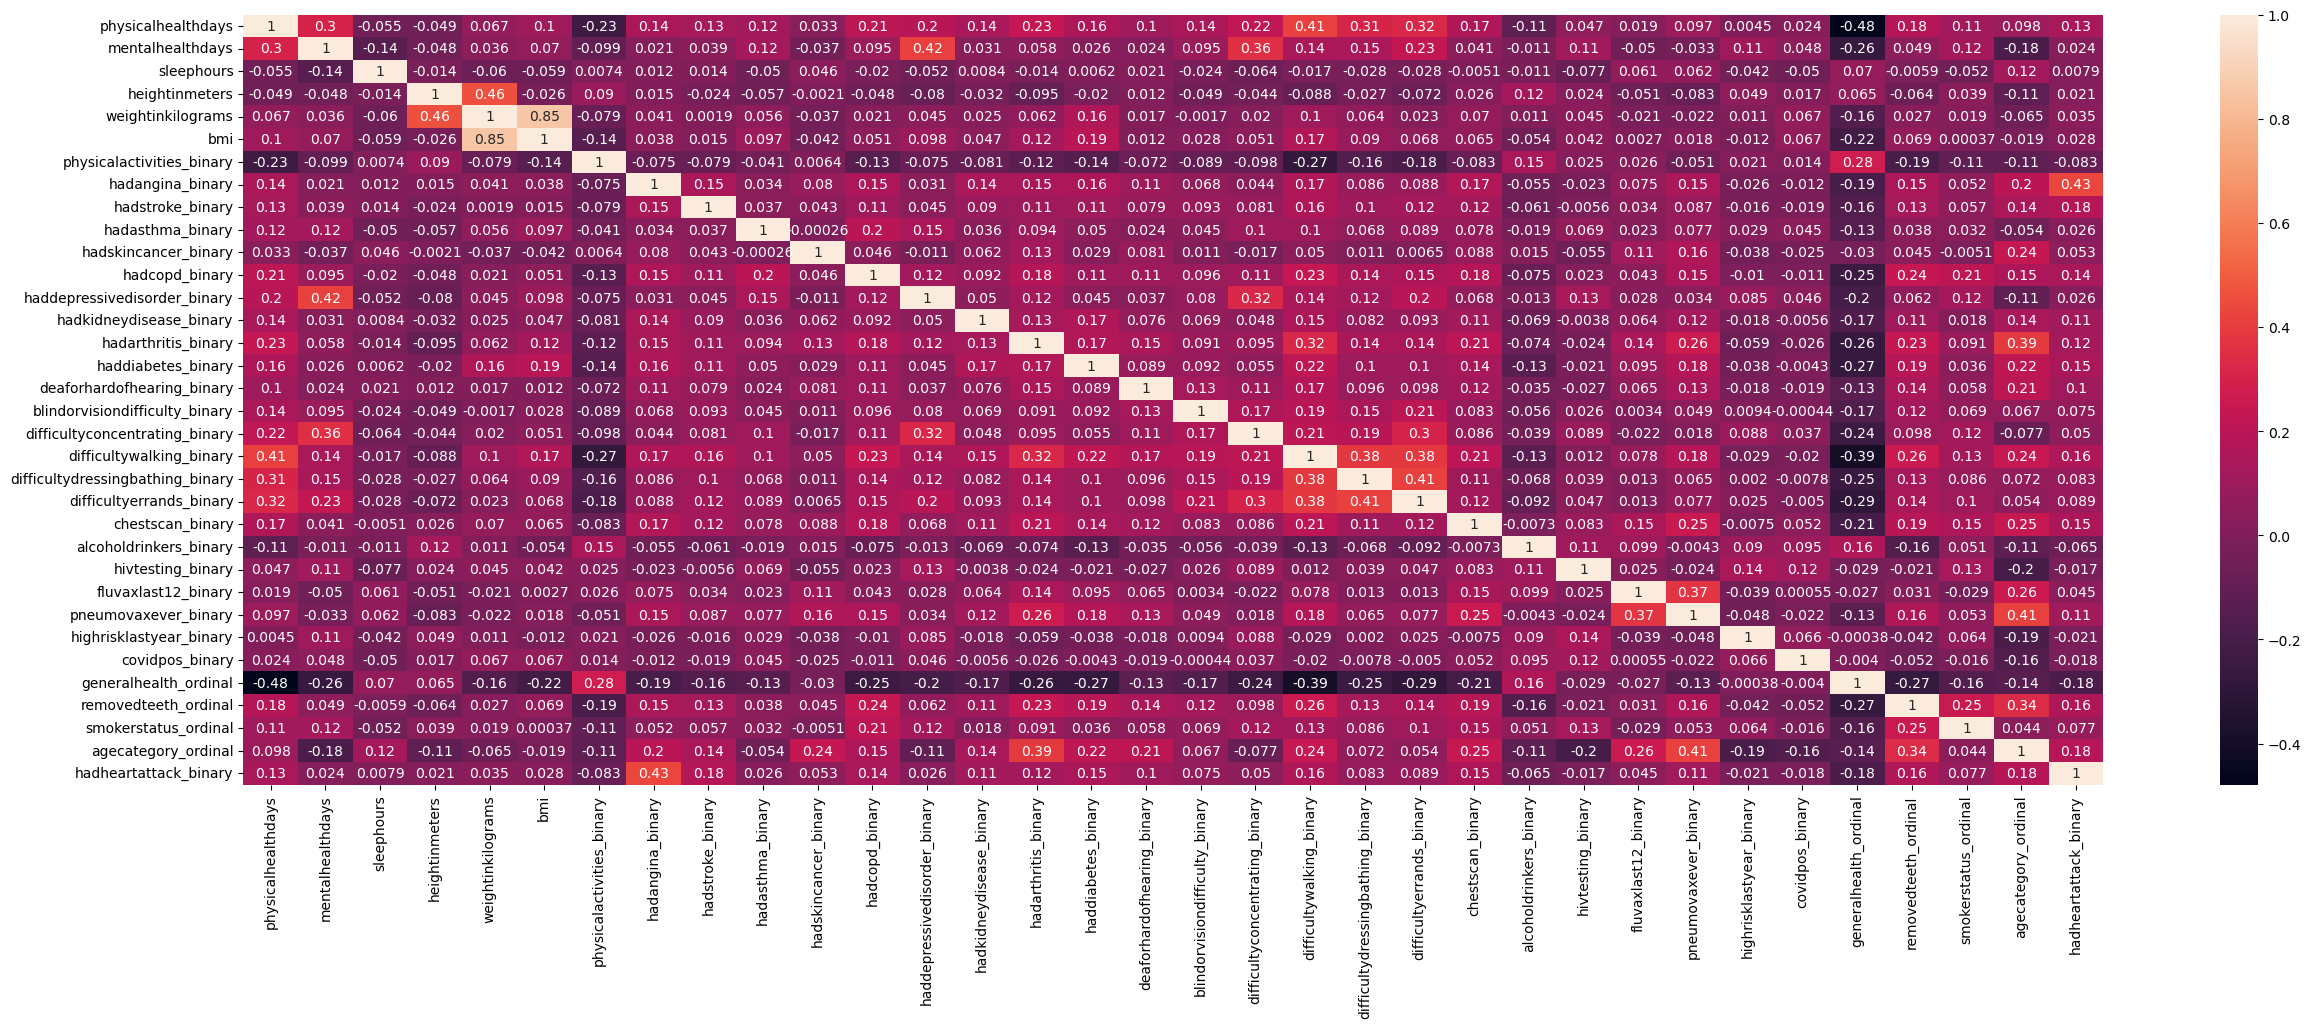

In [213]:
fig, ax=plt.subplots(figsize=(30,10))
ax=sns.heatmap(correlations, annot=True)
plt.show()

# Looking into categorical and numerical values

# For the presentation
Show distributions for heartAttack by different features which are known and interesting to an audience, 
which is not educated in the area. 
Show factors which are easily graspable for the audience like age, smoking, bmi, physicalactivities
Focus is on factors, whcih they can easiliy identify as factors in their dayly life. 

In [ ]:
# Show Scatterplots to show correlation betwenn features and target (for numericals)

In [ ]:
# Create plots with distributions in relation to the target value
    # When you are presenting you only chose a couple of them 
    # You present the ones which are interesting for you

In [ ]:
# If you find from your analysis
    # This four parameters are highly predicative of having a heartattack 
    # If you think 4 or 5 features are important, than you can use them  

# Plotting in relation to target value hadheartattack

In [230]:
df_analysis.columns

Index(['physicalhealthdays', 'mentalhealthdays', 'sleephours',
       'heightinmeters', 'weightinkilograms', 'bmi', 'bmi_5_bins',
       'heightinmeters_5_bins', 'state', 'sex', 'generalhealth',
       'lastcheckuptime', 'physicalactivities', 'removedteeth',
       'hadheartattack', 'hadangina', 'hadstroke', 'hadasthma',
       'hadskincancer', 'hadcopd', 'haddepressivedisorder', 'hadkidneydisease',
       'hadarthritis', 'haddiabetes', 'deaforhardofhearing',
       'blindorvisiondifficulty', 'difficultyconcentrating',
       'difficultywalking', 'difficultydressingbathing', 'difficultyerrands',
       'smokerstatus', 'ecigaretteusage', 'chestscan', 'agecategory',
       'alcoholdrinkers', 'hivtesting', 'fluvaxlast12', 'pneumovaxever',
       'highrisklastyear', 'covidpos', 'physicalactivities_binary',
       'hadangina_binary', 'hadstroke_binary', 'hadasthma_binary',
       'hadskincancer_binary', 'hadcopd_binary',
       'haddepressivedisorder_binary', 'hadkidneydisease_binary',
    

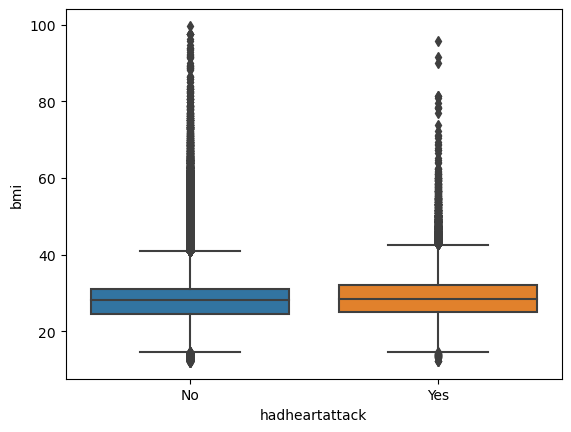

In [215]:
sns.boxplot(x='hadheartattack', y='bmi', data=df_analysis)
plt.show()

In [ ]:
# The median line for people with heart attacks is higher than for people without heartattacks
# A lot of people outside of the 1,5 iqr range seem to have had a heartattack, this might be worth to mention in the presentation!
# Their might be a tendency for extreme vlaues. 

In [ ]:
# Mean value different (barplot)
# Bin bmi vlaues in 3 or 4 categories

In [ ]:
# Check the iqr. It looks in general higher for heartattack than for No heartattack.
    # Middle 50% of bmi with heart attack seems higher
# Insight:
    # People who have heartattacks tend to have a higher median bmi.

In [232]:
# https://www.geeksforgeeks.org/stripplot-using-seaborn-in-python/

sns.stripplot(x='hadheartattack', y='bmi', data=df_analysis, jitter=True)
plt.title('Scatter Plot of BMI vs. Had Heart Attack')
plt.show()

In [ ]:
# https://stackoverflow.com/questions/38799080/seaborne-bar-plot-median-estimator-error

In [237]:
sns.barplot(x='hadheartattack', y='bmi', data=df_analysis, estimator=np.median)
plt.title('Median BMI for each hadheartattack category')
plt.show()

In [ ]:
# Slightlz higher bmi for people with heartattacks

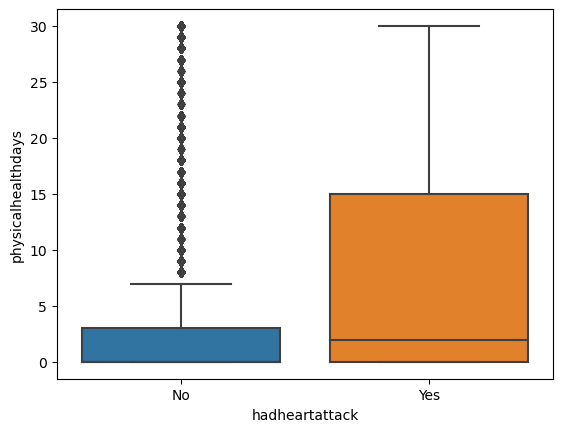

In [218]:
sns.boxplot(x='hadheartattack', y='mentalhealthdays', data=df_analysis)
plt.show()

In [ ]:
# There is greater variability in the "mentalhealthdays" values for individuals who had a heart attack compared to those who did not

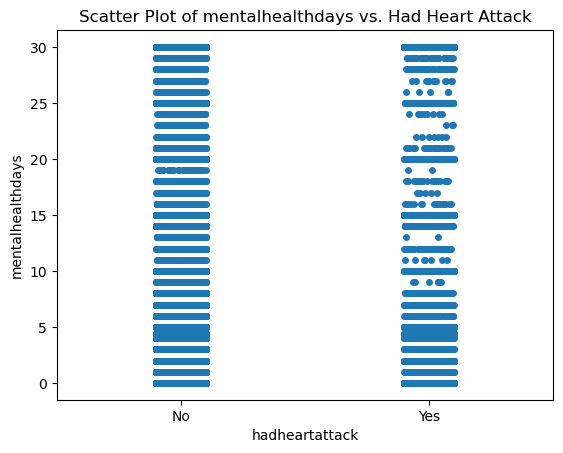

In [238]:
sns.stripplot(x='hadheartattack', y='mentalhealthdays', data=df_analysis, jitter=True)
plt.title('Scatter Plot of mentalhealthdays vs. Had Heart Attack')
plt.show()

In [239]:
sns.barplot(x='hadheartattack', y='mentalhealthdays', data=df_analysis, estimator=np.median)
plt.title('Median mentalhealthdays for each hadheartattack category')
plt.show()

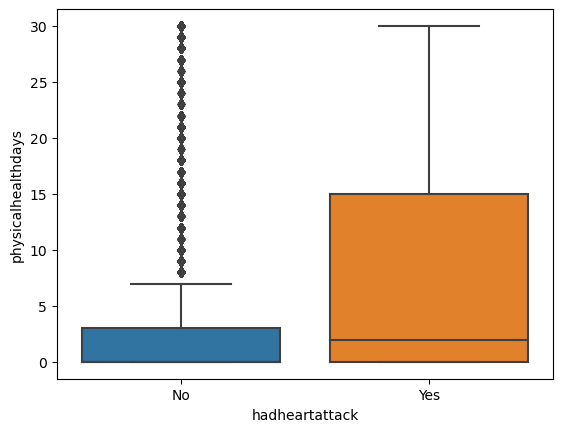

In [219]:
sns.boxplot(x='hadheartattack', y='physicalhealthdays', data=df_analysis)
plt.show()

In [ ]:
# There is greater variability in the "physicalhealthdays" values for individuals who had a heart attack compared to those who did not

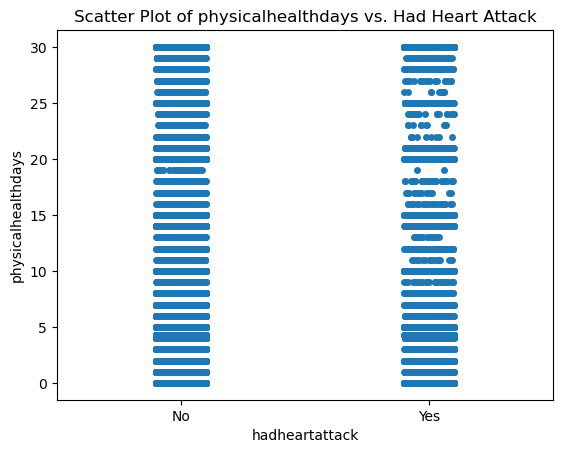

In [240]:
sns.stripplot(x='hadheartattack', y='physicalhealthdays', data=df_analysis, jitter=True)
plt.title('Scatter Plot of physicalhealthdays vs. Had Heart Attack')
plt.show()

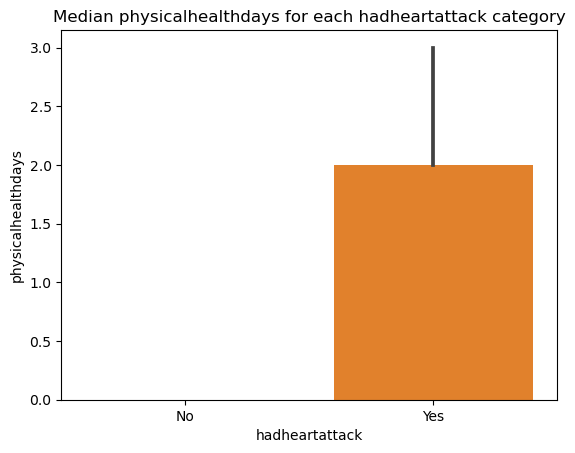

In [241]:
sns.barplot(x='hadheartattack', y='physicalhealthdays', data=df_analysis, estimator=np.median)
plt.title('Median physicalhealthdays for each hadheartattack category')
plt.show()

In [ ]:
# The median value physicalhealthdays for people who have had a heartattack seems to be very low at 2.

In [220]:
sns.boxplot(x='hadheartattack', y='sleephours', data=df_analysis)
plt.show()

In [ ]:
# There is no significant difference in the distribution of sleep hours between individuals who had a heart attack and those who did not

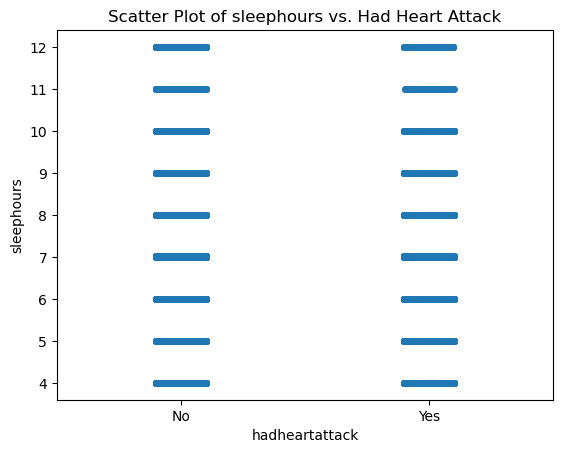

In [242]:
sns.stripplot(x='hadheartattack', y='sleephours', data=df_analysis, jitter=True)
plt.title('Scatter Plot of sleephours vs. Had Heart Attack')
plt.show()

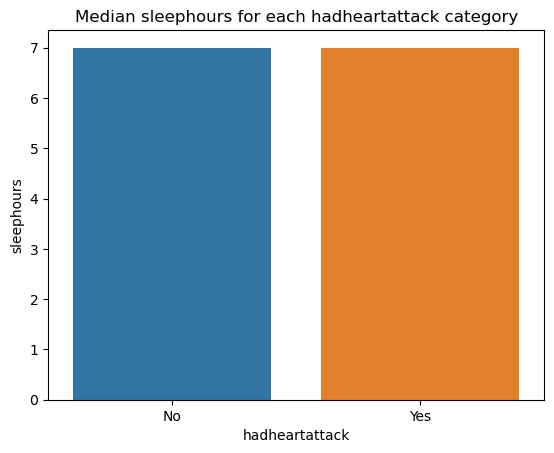

In [243]:
sns.barplot(x='hadheartattack', y='sleephours', data=df_analysis, estimator=np.median)
plt.title('Median sleephours for each hadheartattack category')
plt.show()

In [ ]:
# Equal median for sleephours.

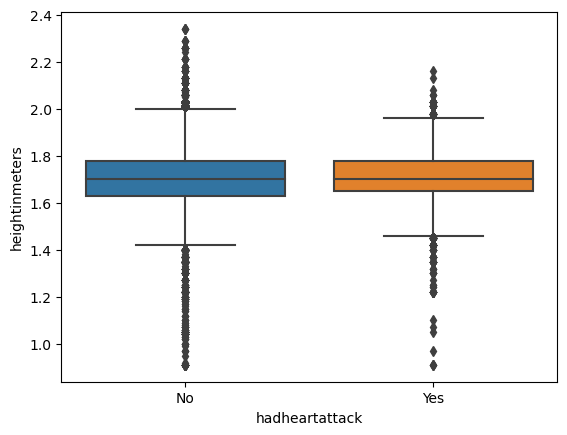

In [221]:
sns.boxplot(x='hadheartattack', y='heightinmeters', data=df_analysis)
plt.show()

In [ ]:
# Tendency for many outliers who are smaller or heigher than 1,5 iqr.

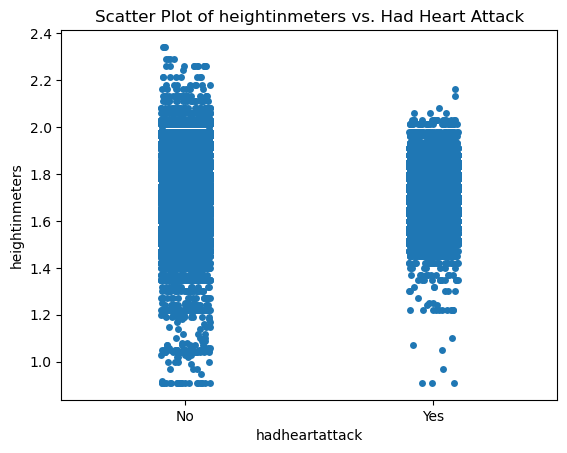

In [245]:
sns.stripplot(x='hadheartattack', y='heightinmeters', data=df_analysis, jitter=True)
plt.title('Scatter Plot of heightinmeters vs. Had Heart Attack')
plt.show()

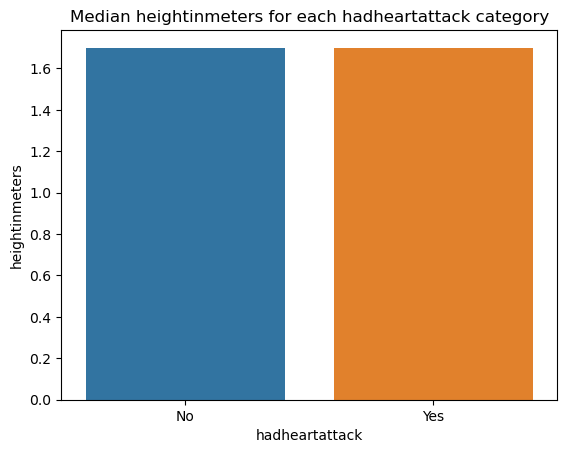

In [244]:
sns.barplot(x='hadheartattack', y='heightinmeters', data=df_analysis, estimator=np.median)
plt.title('Median heightinmeters for each hadheartattack category')
plt.show()

In [ ]:
# Equal median for heightinmeters

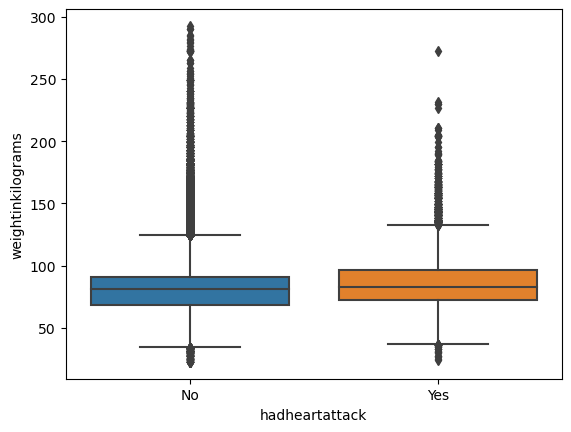

In [222]:
sns.boxplot(x='hadheartattack', y='weightinkilograms', data=df_analysis)
plt.show()

In [ ]:
# The median line for people with heart attacks is higher than for people without heartattacks
# A lot of people outside of the 1,5 iqr range seem to have had a heartattack, this might be worth to mention in the presentation!
# Their might be a tendency for extreme vlaues. 

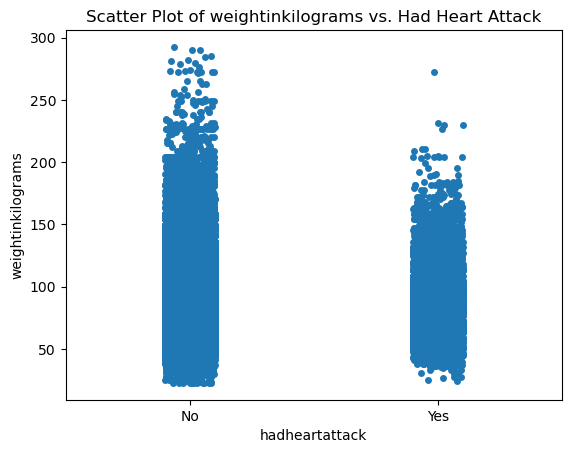

In [246]:
sns.stripplot(x='hadheartattack', y='weightinkilograms', data=df_analysis, jitter=True)
plt.title('Scatter Plot of weightinkilograms vs. Had Heart Attack')
plt.show()

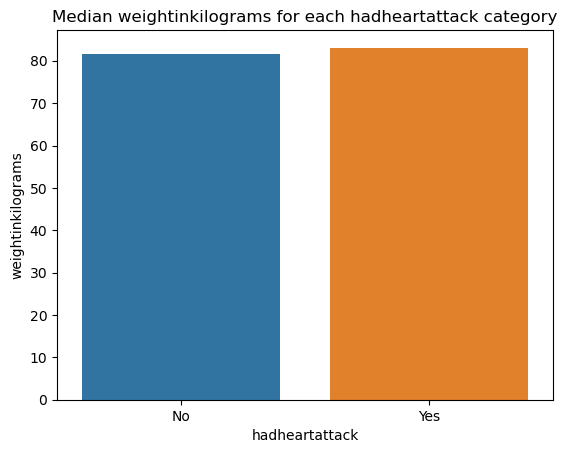

In [247]:
sns.barplot(x='hadheartattack', y='weightinkilograms', data=df_analysis, estimator=np.median)
plt.title('Median weightinkilograms for each hadheartattack category')
plt.show()

In [ ]:
# Higher median weight for people with heartattacks

# Looking more into bined variables

<Axes: xlabel='bmi_5_bins', ylabel='hadheartattack_binary'>

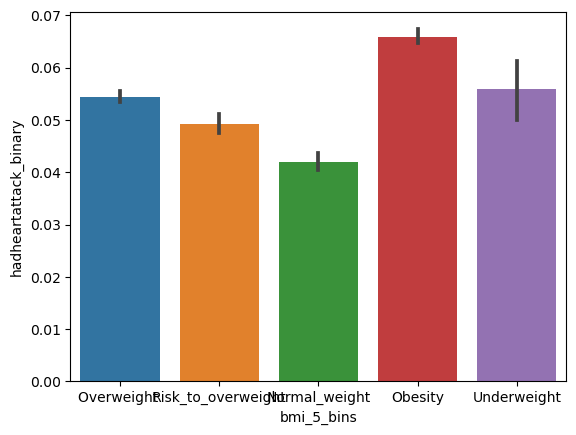

In [259]:
sns.barplot(x='bmi_5_bins', y='hadheartattack_binary', data=df_analysis)


In [ ]:
# For bmi the extreme values seem to have higher risks of heartattaks

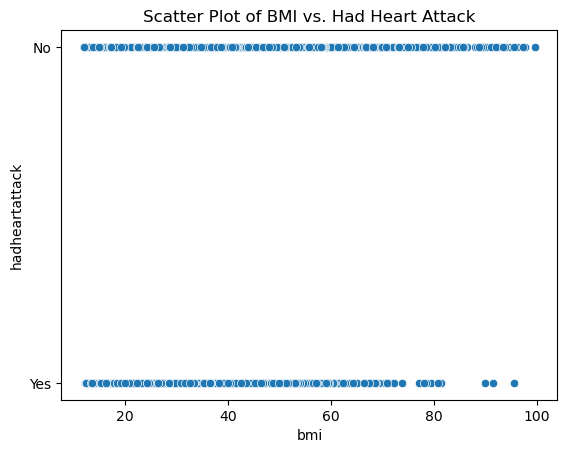

In [251]:
sns.scatterplot(x='bmi', y='hadheartattack', data=df_analysis)
plt.title('Scatter Plot of BMI vs. Had Heart Attack')
plt.show()

<Axes: xlabel='bmi', ylabel='hadheartattack'>

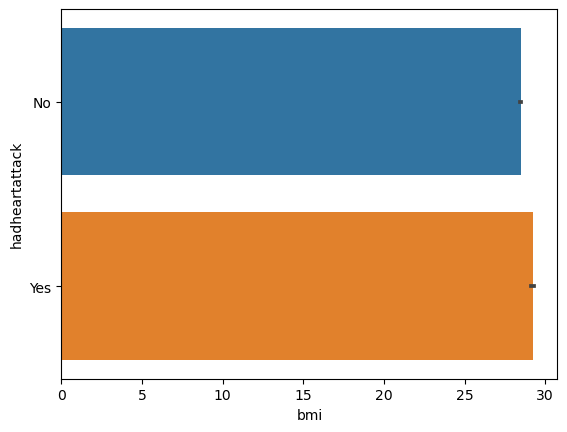

In [261]:
#Show a plot of the Type by hadheartattack.
# bmi in x-Axis 

#sns.barplot(x='hadheartattack', y='', data=heart_cleaned_data) bmi

sns.barplot(x='bmi', y='hadheartattack', data=df_analysis)

<Axes: xlabel='heightinmeters', ylabel='hadheartattack'>

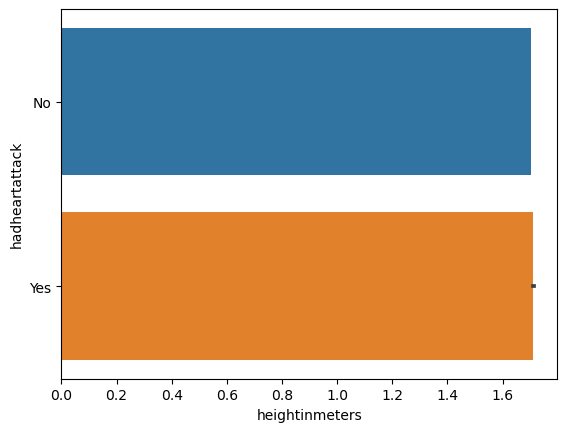

In [265]:
#Show a plot of the Type by hadheartattack.
sns.barplot(x='heightinmeters', y='hadheartattack', data=df_analysis)

In [ ]:
# I will only take bmi in the presentation, heigth is very similar, due to the calculation of bmi.

[None, None, None, None, None, None, None, None, None, None]

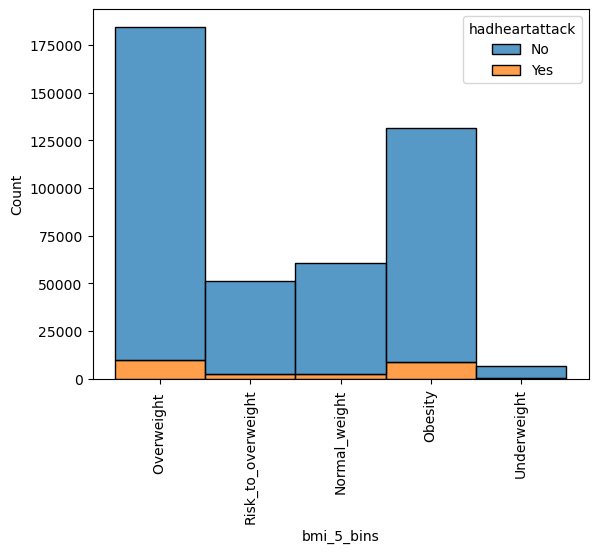

In [268]:
g = sns.histplot(x="bmi_5_bins", hue="hadheartattack", data=df_analysis, stat="count", multiple="stack")
plt.setp(g.get_xticklabels(), rotation=90)

In [ ]:
# Higher bmis, higher hadheartattack

In [269]:
df_analysis.columns

Index(['physicalhealthdays', 'mentalhealthdays', 'sleephours',
       'heightinmeters', 'weightinkilograms', 'bmi', 'bmi_5_bins',
       'heightinmeters_5_bins', 'state', 'sex', 'generalhealth',
       'lastcheckuptime', 'physicalactivities', 'removedteeth',
       'hadheartattack', 'hadangina', 'hadstroke', 'hadasthma',
       'hadskincancer', 'hadcopd', 'haddepressivedisorder', 'hadkidneydisease',
       'hadarthritis', 'haddiabetes', 'deaforhardofhearing',
       'blindorvisiondifficulty', 'difficultyconcentrating',
       'difficultywalking', 'difficultydressingbathing', 'difficultyerrands',
       'smokerstatus', 'ecigaretteusage', 'chestscan', 'agecategory',
       'alcoholdrinkers', 'hivtesting', 'fluvaxlast12', 'pneumovaxever',
       'highrisklastyear', 'covidpos', 'physicalactivities_binary',
       'hadangina_binary', 'hadstroke_binary', 'hadasthma_binary',
       'hadskincancer_binary', 'hadcopd_binary',
       'haddepressivedisorder_binary', 'hadkidneydisease_binary',
    

In [ ]:
# Smoking, physical, activity, age

<Axes: xlabel='smokerstatus_ordinal', ylabel='hadheartattack_binary'>

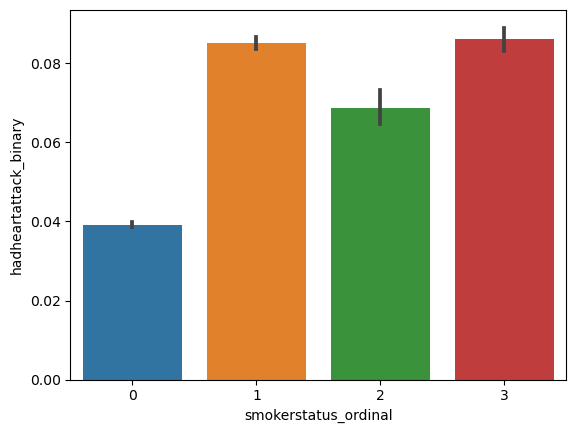

In [271]:
sns.barplot(x='smokerstatus_ordinal', y='hadheartattack_binary', data=df_analysis)

In [ ]:
# Group "never smoked" has significantly lower hadheartattack than all the other groups, who have smoked or are smoking.

smokerstatus_mapping = {
    'Never smoked': 0,
    'Former smoker': 1,
    'Current smoker - now smokes some days': 2,
    'Current smoker - now smokes every day': 3}


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

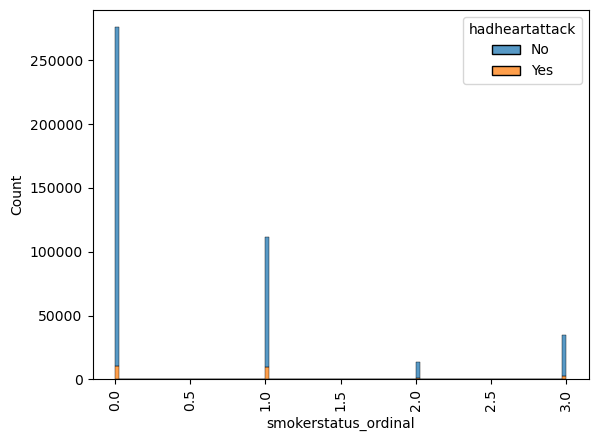

In [272]:
g = sns.histplot(x="smokerstatus_ordinal", hue="hadheartattack", data=df_analysis, stat="count", multiple="stack")
plt.setp(g.get_xticklabels(), rotation=90)

<Axes: xlabel='physicalactivities_binary', ylabel='hadheartattack_binary'>

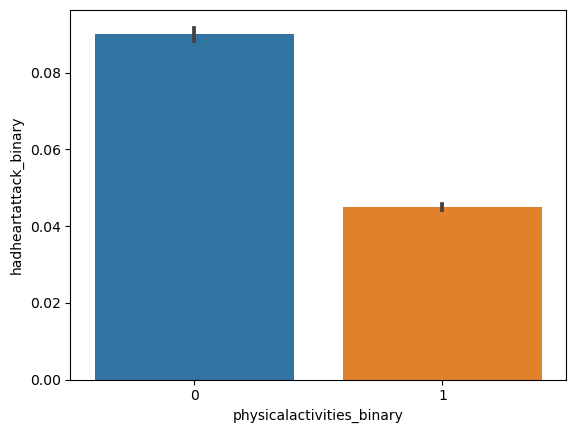

In [273]:
sns.barplot(x='physicalactivities_binary', y='hadheartattack_binary', data=df_analysis)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

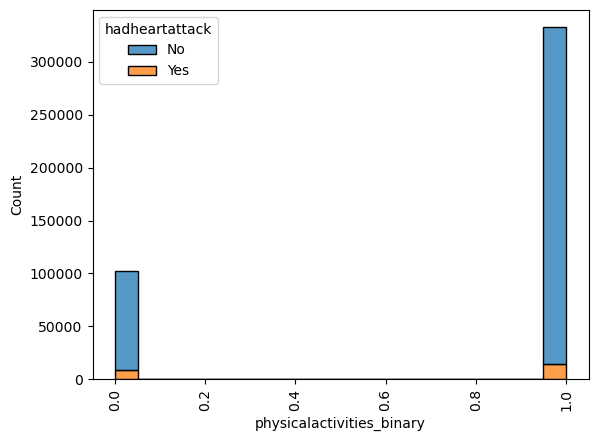

In [274]:
g = sns.histplot(x="physicalactivities_binary", hue="hadheartattack", data=df_analysis, stat="count", multiple="stack")
plt.setp(g.get_xticklabels(), rotation=90)

In [ ]:
# The percentage of hadheartattack is higher for people without physical activities.

<Axes: xlabel='agecategory_ordinal', ylabel='hadheartattack_binary'>

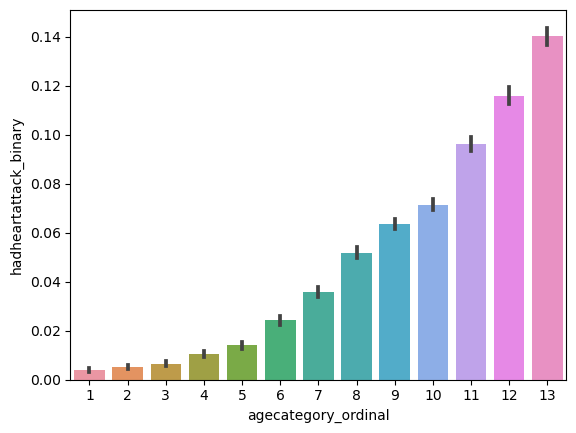

In [275]:
sns.barplot(x='agecategory_ordinal', y='hadheartattack_binary', data=df_analysis)

In [ ]:
# For age the correlation is clearly visible. The higher the agegroup, the higher the amount of heart attacks.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

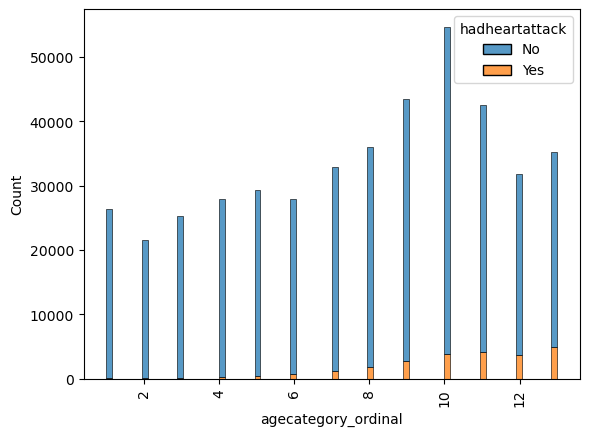

In [276]:
g = sns.histplot(x="agecategory_ordinal", hue="hadheartattack", data=df_analysis, stat="count", multiple="stack")
plt.setp(g.get_xticklabels(), rotation=90)

In [ ]:
# hadangina_binary had a really high correlation to the target variable of 0.43

<Axes: xlabel='hadangina_binary', ylabel='hadheartattack_binary'>

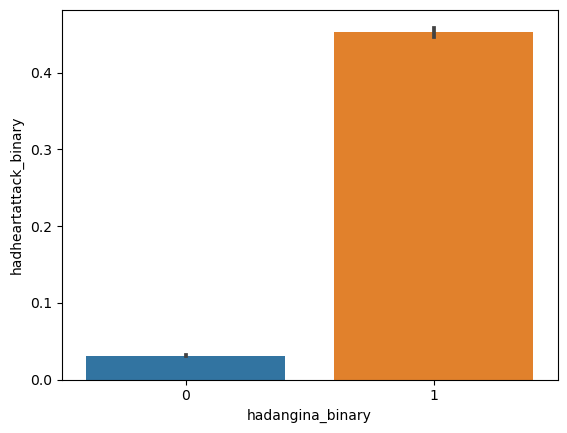

In [279]:
sns.barplot(x='hadangina_binary', y='hadheartattack_binary', data=df_analysis)

In [ ]:
#  There might be a higher proportion or count of individuals who had both angina and a heart attack compared to those did not have angina but a heartattack.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

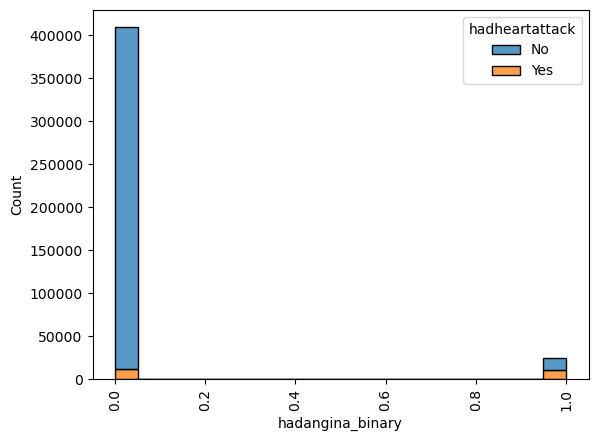

In [280]:
g = sns.histplot(x="hadangina_binary", hue="hadheartattack", data=df_analysis, stat="count", multiple="stack")
plt.setp(g.get_xticklabels(), rotation=90)

# Create and test (at least one) hypothesis

In [202]:
# Ideally the hypothesis refers and supports a correlation that I found creating distributions, scatterplots usw. 

In [203]:
# Formulate Hypothesis (target variable is categorical so switch the formulation)
    # Lesson 4.03
    #equality --> 2 sided test
    #bigger or smaller --> 1 sided test

In [204]:
# People with a heartattack have an average bmi over 25
    # H0 (The average BMI for people with a heart attack is 25 or less.)
    # H1 (The average BMI for people with a heart attack is greater than 25.)

In [205]:
# This would be people with bmi > 25
    # bmi_25_or_over = df_analysis[df_analysis['bmi'] > 25] 
    
# I have to search for people with heartattack and thecorresponding bmi
    
had_heart_attack = df_analysis[df_analysis['hadheartattack']=='Yes']['bmi'].dropna()
had_heart_attack


# Example from the class
    # salaries_police = salaries[salaries['Department'] == 'POLICE']['Annual Salary'].dropna()
    # Grpup by unique values in column Rooms, select the median Price
    # median_price_plot = data.groupby('Rooms')['Price'].median().reset_index() 


5         26.08
26        37.45
31        24.39
32        39.16
34        19.37
          ...  
434673    28.53
434677    33.38
434678    20.02
434684    36.54
434699    32.55
Name: bmi, Length: 24175, dtype: float64

In [206]:
# Import the library for ttest (Here double just to have all options in the example)
import scipy.stats
from scipy.stats import ttest_1samp

In [207]:
# one sample t-test, test this one-sided hypothesis at the 95% confidence level

In [208]:
stat, pval = ttest_1samp(had_heart_attack, 30)
print('stat for the one-tailed test is ', stat)
print('pvalue for the one-tailed test is ', pval/2) # Because we have a onesided test we divide the value by 2

stat for the one-tailed test is  -19.348574378136057
pvalue for the one-tailed test is  4.432506241847456e-83


In [209]:
# Conclusion
    # The p-value is close to 0. This is an indication, that there is strong evidence to reject the H0 hypothesis. 
    # The stat value indicates that the actual value is significantly less than 30


# Formulate conclusion/ answer

In [278]:
# Research Question
    # Identify key factors associated with target value hadheartattack.
    
    # Following factors seem to have a correlation to the target value
        # For bmi, the extreme values seem to have higher risks of heartattaks
        # Group "Never smoked" has significantly lower hadheartattack percentage, than all the other groups, who have smoked or are smoking.
        # For age the correlation is clearly visible. The higher the agegroup, the higher the amount of heart attacks.
        # The percentage of hadheartattack is higher for people without physical activities.
        # There might be a higher proportion or count of individuals who had both angina and a heart attack compared to those who did not have angina but a heartattack.

Smoking, physical activity the age group and the fact if somebody have had an agina, seem to have an influence on the probabilyty that the person will have a heartattack or had have a heartattack int his case. 
There seems to be a correlation to the target variable hadheartattack.

The next steps for a further analysis would be to formulate a hypothesis for each relevant factor to support the findings 

And to take the relevant factors as features and build a prediction model to predict if somebody have had a heartattack
and identify this persin as part of a risk group.     